In [ ]:
# !pip install opendatasets

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import opendatasets as od
# import pandas

# od.download(
#     "https://www.kaggle.com/datasets/fedesoriano/stellar-classification-dataset-sdss17")

In [ ]:
cd /content/drive/MyDrive/stellar/stellar-classification-dataset-sdss17

/content/drive/.shortcut-targets-by-id/10w78KTznZw72rd0hzdnNIkB6YBXjzLqP/stellar/stellar-classification-dataset-sdss17


In [ ]:
import pandas as pds

# reading the XLSX file
file =('star_classification.csv')
newData = pds.read_csv(file)

# displaying the contents of the XLSX file
newData.head()

obj_ID       alpha      delta         u         g         r  \
0  1.237661e+18  135.689107  32.494632  23.87882  22.27530  20.39501   
1  1.237665e+18  144.826101  31.274185  24.77759  22.83188  22.58444   
2  1.237661e+18  142.188790  35.582444  25.26307  22.66389  20.60976   
3  1.237663e+18  338.741038  -0.402828  22.13682  23.77656  21.61162   
4  1.237680e+18  345.282593  21.183866  19.43718  17.58028  16.49747   

          i         z  run_ID  rerun_ID  cam_col  field_ID   spec_obj_ID  \
0  19.16573  18.79371    3606       301        2        79  6.543777e+18   
1  21.16812  21.61427    4518       301        5       119  1.176014e+19   
2  19.34857  18.94827    3606       301        2       120  5.152200e+18   
3  20.50454  19.25010    4192       301        3       214  1.030107e+19   
4  15.97711  15.54461    8102       301        3       137  6.891865e+18   

    class  redshift  plate    MJD  fiber_ID  
0  GALAXY  0.634794   5812  56354       171  
1  GALAXY  0.779136  10445  58158       427  
2  GALAXY  0.644195   4576  55592       299  
3  GALAXY  0.932346   9149  58039       775  
4  GALAXY  0.116123   6121  56187       842

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from IPython.display import display

In [ ]:
from matplotlib import pyplot as plt
from matplotlib import style
style.use(style='seaborn-deep')

In [ ]:
from tabulate import tabulate

In [ ]:
import numpy as np
import os
import pickle
import seaborn as sns

In [ ]:
newData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [ ]:
print("The shape of the dataset: {}".format(newData.shape))

The shape of the dataset: (100000, 18)


In [ ]:
labels = newData['class'].unique()
print(labels)

['GALAXY' 'QSO' 'STAR']


In [ ]:
def class_distribution(df, target, classes=labels):
    """
    This function plots the distribution of given data[label].

    Parameters
    ----------
    `df`: dataset
    `label`: target name in the dataset

    Returns none.
    """
    class_df = df[target].value_counts().to_frame()
    pers = class_df.apply(lambda x: round((x / df.shape[0]) * 100, 2))
    class_df['Percentage'] = pers

    plt.figure(figsize=(10, 5))
    plt.subplot(121)
    colors = ["blue", "brown", "green"]
    bars = sns.barplot(x=class_df.index, y=class_df[target], palette=colors)
    for b in bars.patches:
        x = b.get_x() + (b.get_width() / 2)
        y = b.get_height()
        bars.annotate(text=format(y),
                      xy=(x, y), ha='center', va='center', size=8,
                      xytext=(0, 6), textcoords='offset points')

    plt.title(label='Class Distribution', fontsize=15)

    plt.subplot(122)
    plt.pie(x=class_df['Percentage'].values,
            labels=labels,
            autopct='%1.1f%%')
    plt.title(label='Class Proportion', fontsize=10)
    plt.savefig("graph.png", dpi=1200)
    plt.show()

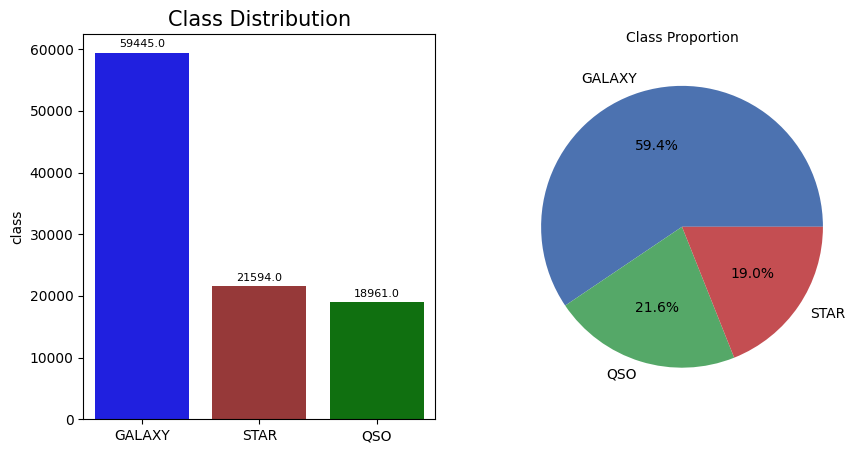

In [ ]:
class_distribution(df=newData, target='class')

In [ ]:
display(newData.isnull().sum())

obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64

In [ ]:
imp_cols = ['alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'redshift']

In [ ]:
display(newData[imp_cols].describe().T)

count        mean        std          min         25%  \
alpha     100000.0  177.629117  96.502241     0.005528  127.518222   
delta     100000.0   24.135305  19.644665   -18.785328    5.146771   
u         100000.0   21.980468  31.769291 -9999.000000   20.352353   
g         100000.0   20.531387  31.750292 -9999.000000   18.965230   
r         100000.0   19.645762   1.854760     9.822070   18.135828   
i         100000.0   19.084854   1.757895     9.469903   17.732285   
z         100000.0   18.668810  31.728152 -9999.000000   17.460677   
redshift  100000.0    0.576661   0.730707    -0.009971    0.054517   

                 50%         75%         max  
alpha     180.900700  233.895005  359.999810  
delta      23.645922   39.901550   83.000519  
u          22.179135   23.687440   32.781390  
g          21.099835   22.123767   31.602240  
r          20.125290   21.044785   29.571860  
i          19.405145   20.396495   32.141470  
z          19.004595   19.921120   29.383740  
redshift    0.424173    0.704154    7.011245

In [ ]:
def box_plotter(df, features, target):
    """
    This is funtion helps in plotting the boxplot of data.

    Parameters
    ----------
    `df`: dataset
    `features`: columns for analysis
    `target`: target column name

    Returns none.
    """
    plt.figure(figsize=(15, 30))
    colors = ["#0000FF", "#3366FF", "#6699FF"]
    for (i, feature) in zip(range(len(features)), features):
        plt.subplot(int('{}2{}'.format(len(features), i+1)))
        sns.boxplot(x=target, y=feature, data=df,palette=colors,
                    width=0.5, flierprops={'marker': 'x'})
        plt.title(label='Boxplot of {}'.format(feature), fontsize=10)
        plt.xlabel(xlabel=None)
        plt.ylabel(ylabel=None)
        i += 1
    plt.show()

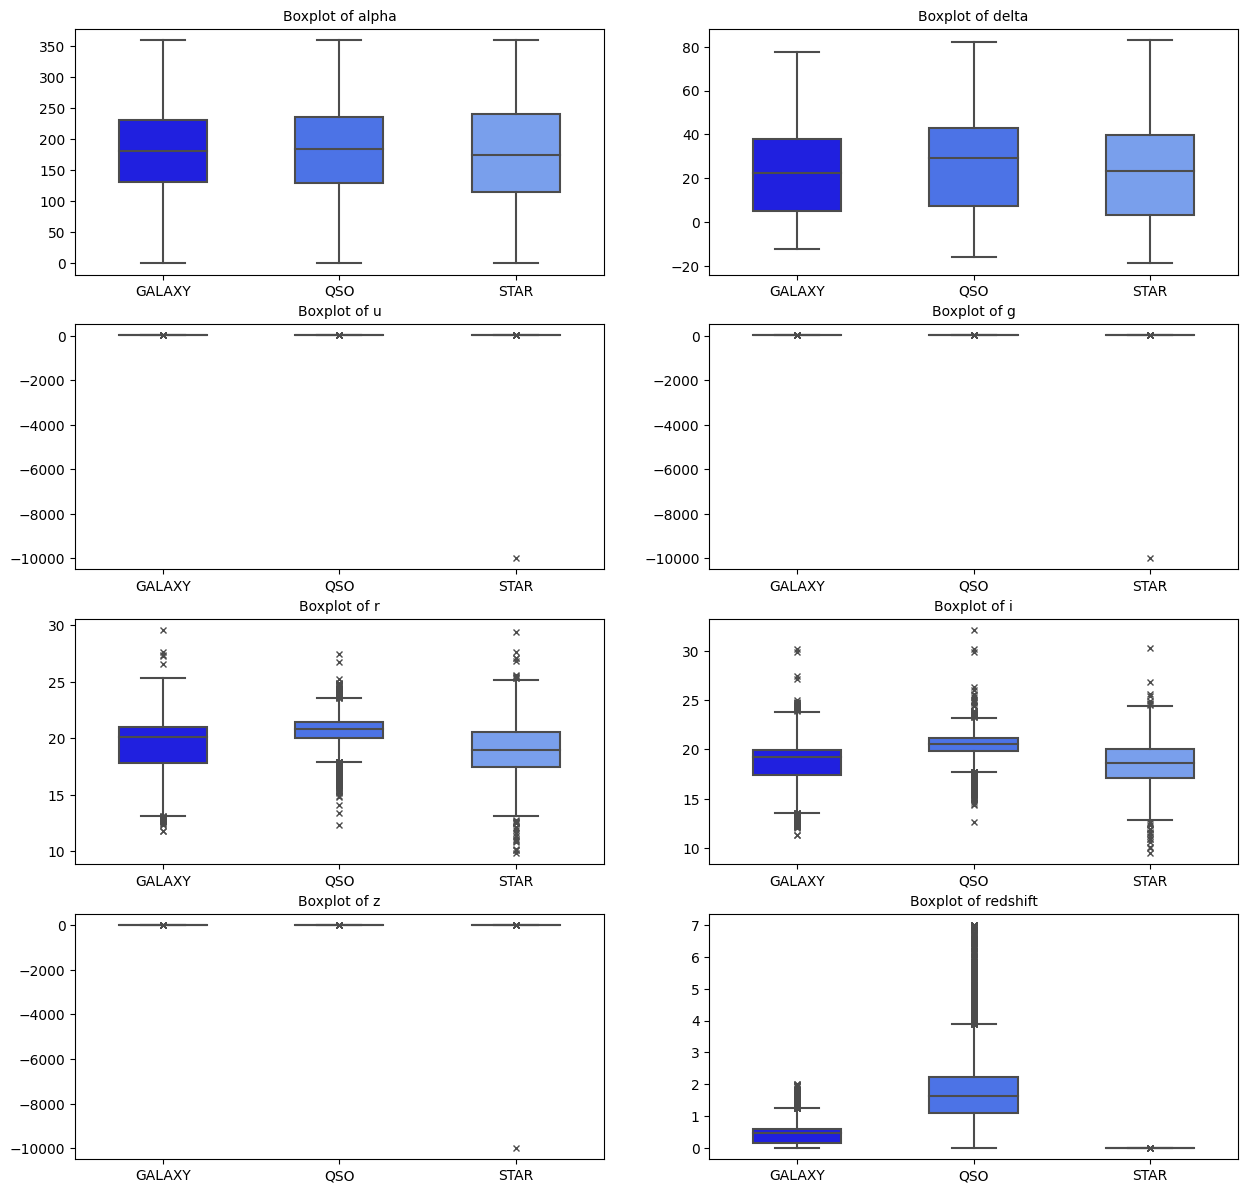

In [ ]:
box_plotter(df=newData, features=imp_cols,target='class')

In [ ]:
display(newData[newData['u'] == min(newData['u'])][imp_cols + ['class']])

alpha     delta       u       g        r         i       z  \
79543  224.006526 -0.624304 -9999.0 -9999.0  18.1656  18.01675 -9999.0   

       redshift class  
79543  0.000089  STAR

In [ ]:
display(newData[newData['g'] == min(newData['g'])][imp_cols + ['class']])

alpha     delta       u       g        r         i       z  \
79543  224.006526 -0.624304 -9999.0 -9999.0  18.1656  18.01675 -9999.0   

       redshift class  
79543  0.000089  STAR

In [ ]:
display(newData[newData['z'] == min(newData['z'])][imp_cols + ['class']])

alpha     delta       u       g        r         i       z  \
79543  224.006526 -0.624304 -9999.0 -9999.0  18.1656  18.01675 -9999.0   

       redshift class  
79543  0.000089  STAR

In [ ]:
newData = newData.drop(index=[79543])
print("The shape of the dataset: {}".format(newData.shape))

The shape of the dataset: (99999, 18)


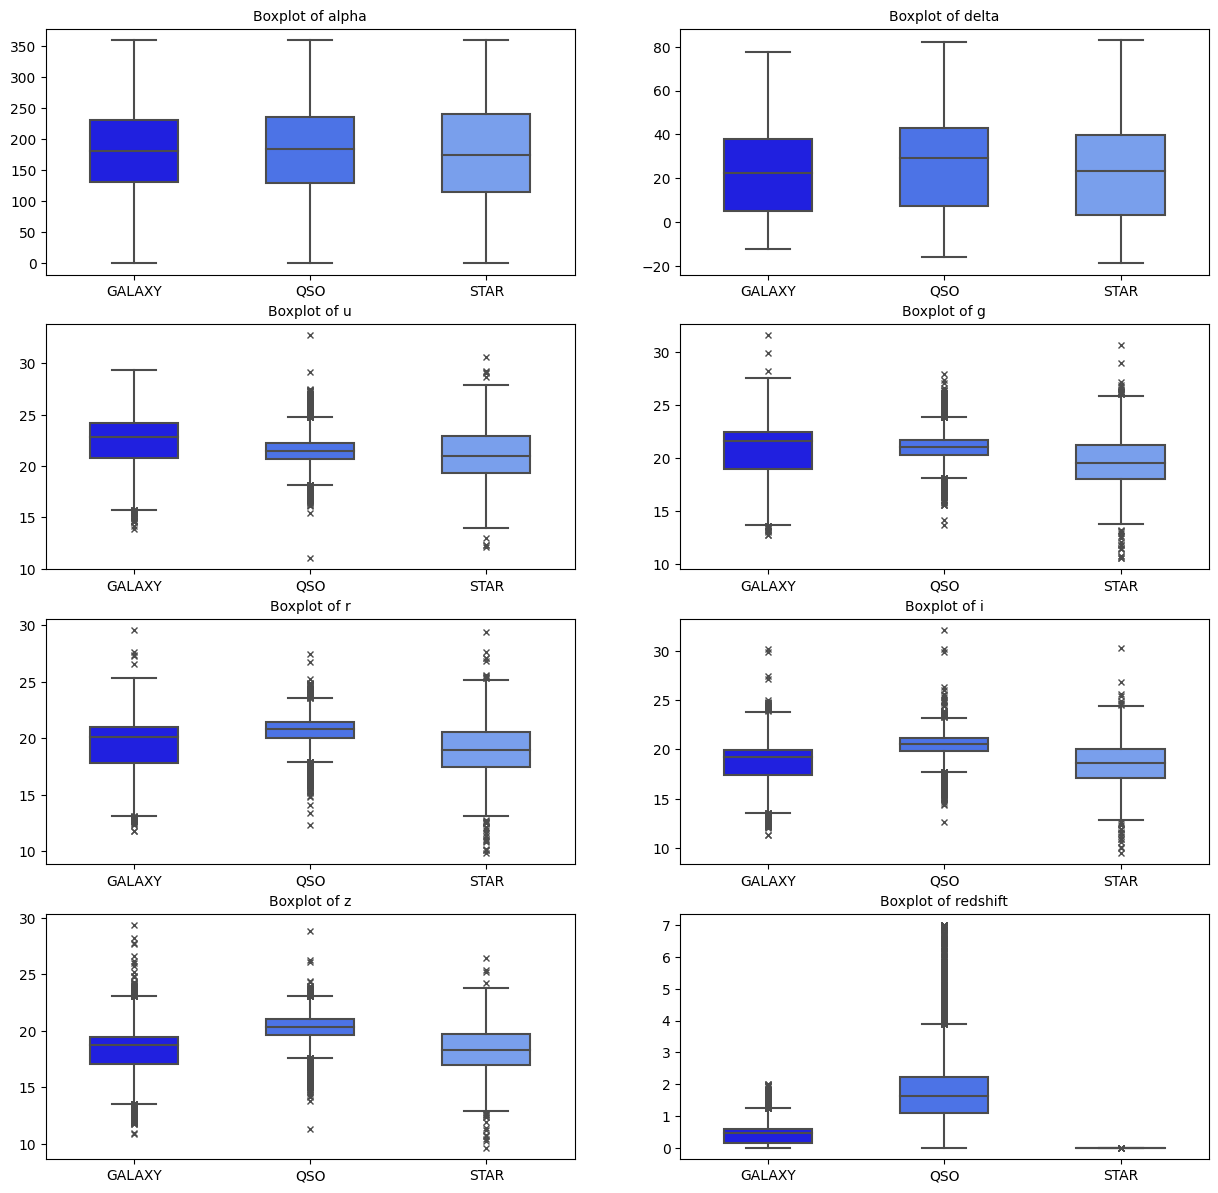

In [ ]:
box_plotter(df=newData, features=imp_cols, target='class')

In [ ]:
def pdf_plotter(df, features, target):
    """
    This is funtion helps in plotting the pdf of data.

    Parameters
    ----------
    `df`: dataset
    `features`: columns for analysis
    `target`: target column name

    Returns none.
    """
    plt.figure(figsize=(15, 30))
    colors = ["blue","red","green"]
    for (i, feature) in zip(range(len(features)), features):
        plt.subplot(int('{}2{}'.format(len(features), i+1)))
        sns.kdeplot(data=df, x=feature, hue=target,palette=colors, shade=True)
        plt.title(label='PDF of {}'.format(feature), fontsize=10)
        plt.xlabel(xlabel='')
        plt.grid()
        i += 1
    plt.show()

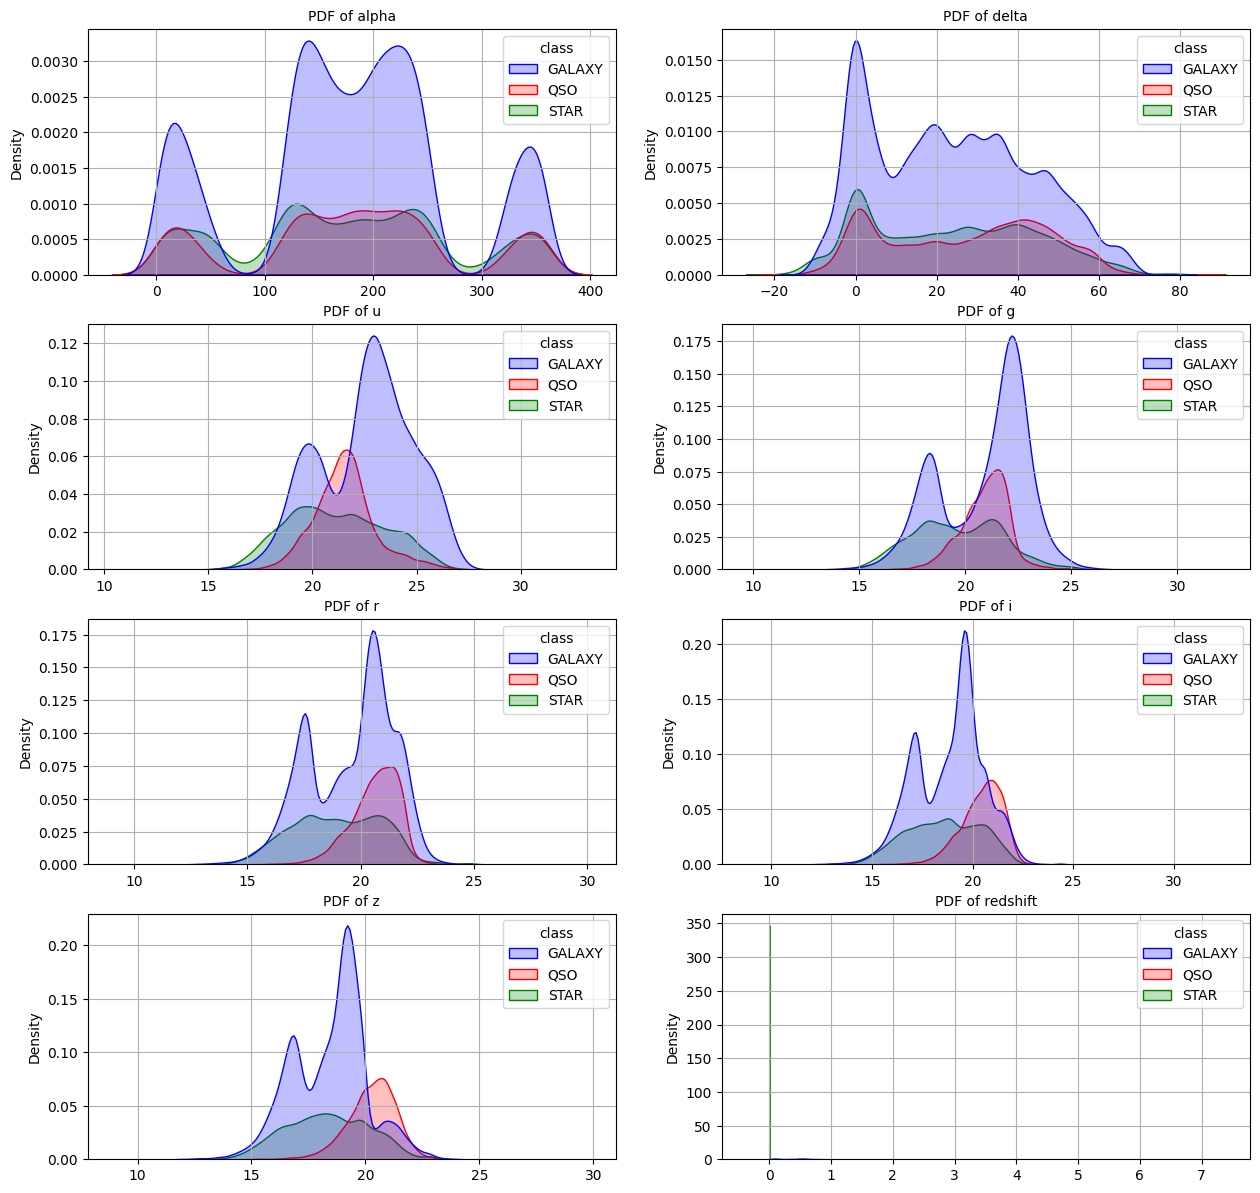

In [ ]:
pdf_plotter(df=newData, features=imp_cols, target='class')

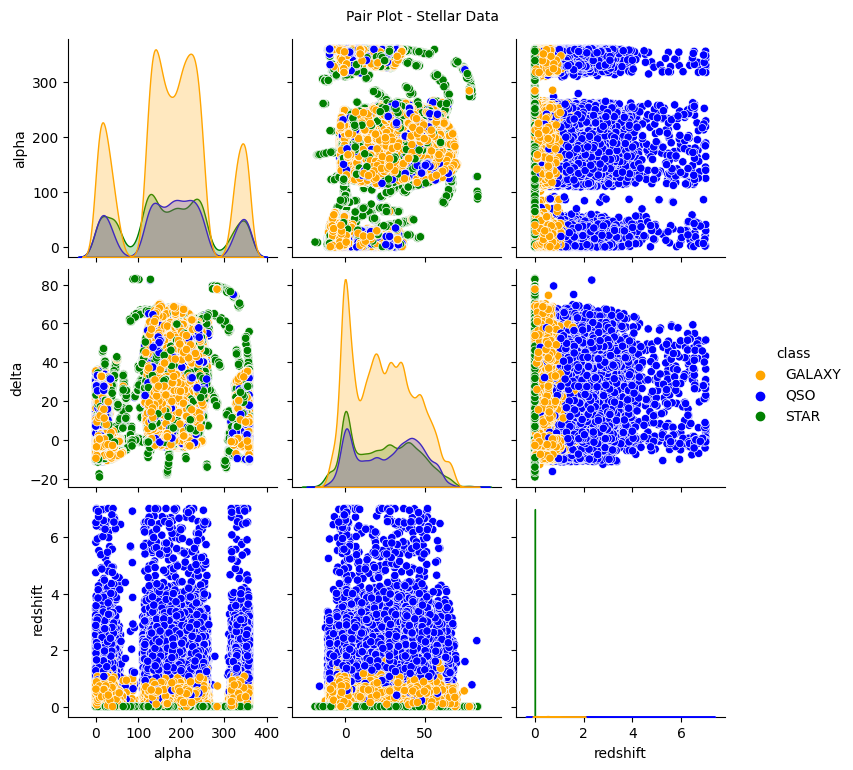

In [ ]:
colors = ["orange","blue","green"]
g = sns.pairplot(data=newData[['alpha', 'delta', 'redshift', 'class']],
                 hue='class', palette=colors)
g.fig.suptitle(t='Pair Plot - Stellar Data', y=1.02, fontsize=10)
plt.show()

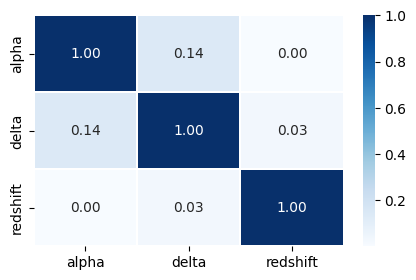

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 3))
sns.heatmap(data=newData[['alpha', 'delta', 'redshift']].corr(),
            annot=True, fmt='.2f', linewidths=0.1, cmap='Blues')
plt.show()


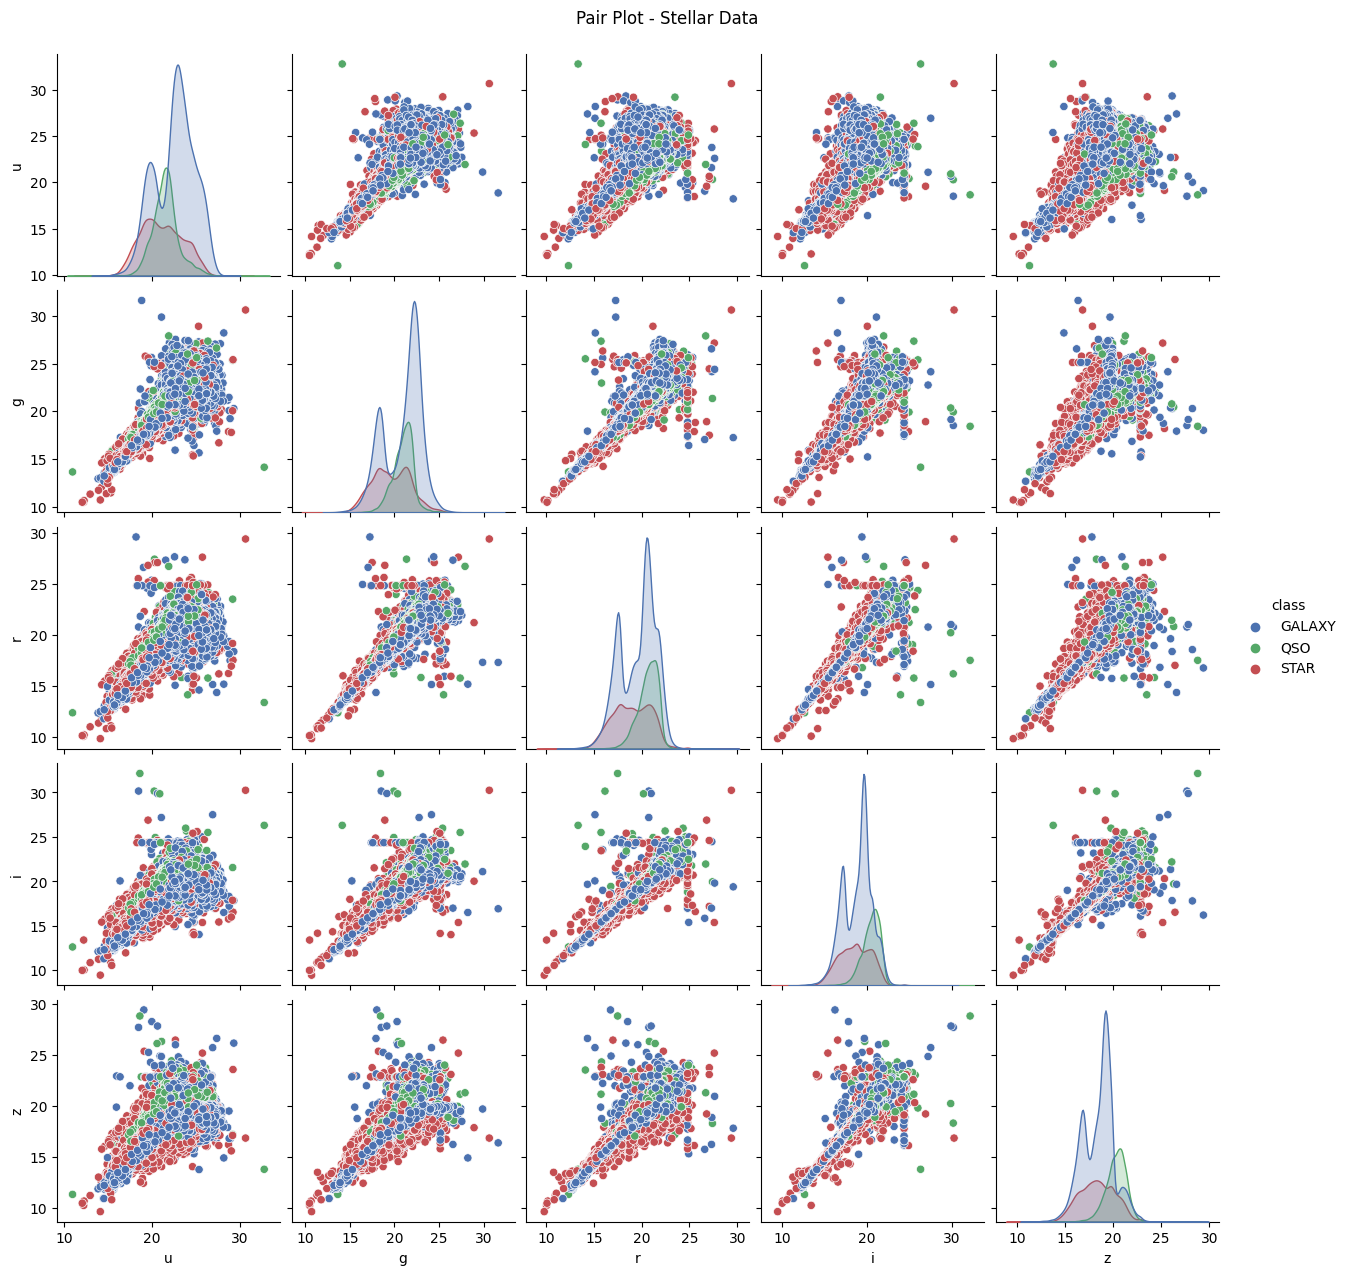

In [ ]:
g = sns.pairplot(data=newData[['u', 'g', 'r', 'i', 'z', 'class']], hue='class')
g.fig.suptitle(t='Pair Plot - Stellar Data', y=1.02)
plt.show()

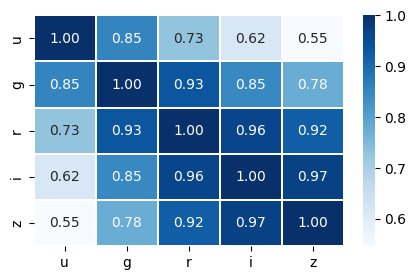

In [ ]:
plt.figure(figsize=(5, 3))
sns.heatmap(data=newData[['u', 'g', 'r', 'i', 'z']].corr(),
            annot=True, fmt='.2f', linewidths=0.1, cmap='Blues')
plt.show()

In [ ]:
X = newData[imp_cols]
y = newData['class'].values

In [ ]:
print(X.columns)
print("The shape of X: {}".format(X.shape))
print("The shape of y: {}".format(y.shape))

Index(['alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'redshift'], dtype='object')
The shape of X: (99999, 8)
The shape of y: (99999,)


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
(X_train,
 X_test,
 y_train,
 y_test) = train_test_split(X, y,
                            stratify=y, test_size=0.3, random_state=42)

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

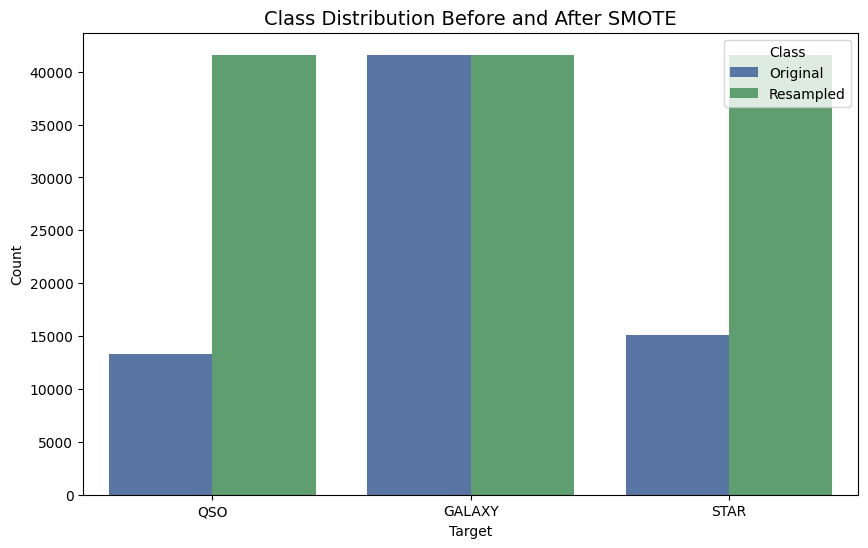

In [ ]:
import pandas as pd
# Create a DataFrame to store the counts of the original and resampled classes
class_counts = pd.DataFrame({"Class": ["Original"] * len(y_train) + ["Resampled"] * len(y_train_resampled),
                             "Target": list(y_train) + list(y_train_resampled)})

# Plot the bar diagram
plt.figure(figsize=(10, 6))
sns.countplot(x="Target", hue="Class", data=class_counts)
plt.title("Class Distribution Before and After SMOTE", fontsize=14)
plt.xlabel("Target", fontsize=10)
plt.ylabel("Count", fontsize=10)
plt.legend(title="Class", loc="upper right", labels=["Original", "Resampled"])
plt.show()

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X_train_resampled, y_train_resampled , test_size=0.2, random_state=42)

In [ ]:
X_test, X_cv, y_test, y_cv = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
print("The shape of X_train dataset: {}".format(X_train.shape))
print("The shape of X_cv dataset: {}".format(X_cv.shape))
print("The shape of X_test dataset: {}".format(X_test.shape))

The shape of X_train dataset: (99866, 8)
The shape of X_cv dataset: (12484, 8)
The shape of X_test dataset: (12483, 8)


In [ ]:
print("The shape of y_train dataset: {}".format(y_train.shape))
print("The shape of y_cv dataset: {}".format(y_cv.shape))
print("The shape of y_test dataset: {}".format(y_test.shape))

The shape of y_train dataset: (99866,)
The shape of y_cv dataset: (12484,)
The shape of y_test dataset: (12483,)


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaling = MinMaxScaler()

In [ ]:
X_train = scaling.fit_transform(X=X_train)
X_cv = scaling.transform(X=X_cv)
X_test = scaling.transform(X=X_test)

In [ ]:
def make_dataframe(arr, cols):
    """
    This function builts the dataframe.

    Parameters
    ----------
    `arr`: array of 2 dimension
    `cols`: column names

    Returns a dataframe.
    """
    df = pd.DataFrame(data=arr, columns=cols)
    return df

In [ ]:
train_df_fea = make_dataframe(arr=X_train, cols=imp_cols)
cv_df_fea = make_dataframe(arr=X_cv, cols=imp_cols)
test_df_fea = make_dataframe(arr=X_test, cols=imp_cols)

In [ ]:
def featurize(df):
    """
    This function featurizes the dataframe.

    Parameter
    ---------
    `df`: dataframe

    Returns a dataframe.
    """
    df['g-r'] = df['g'] - df['r']
    df['i-z'] = df['i'] - df['z']
    df['u-r'] = df['u'] - df['r']
    df['i-r'] = df['i'] - df['r']
    df['z-r'] = df['z'] - df['r']
    return df

In [ ]:
train_df_fea = featurize(df=train_df_fea)
cv_df_fea = featurize(df=cv_df_fea)
test_df_fea = featurize(df=test_df_fea)

In [ ]:
fea_cols = ['u', 'g', 'r', 'redshift', 'g-r', 'i-z', 'u-r', 'i-r', 'z-r']
print(fea_cols)

['u', 'g', 'r', 'redshift', 'g-r', 'i-z', 'u-r', 'i-r', 'z-r']


In [ ]:
X_train_fea = train_df_fea[fea_cols].values
X_cv_fea = cv_df_fea[fea_cols].values
X_test_fea = test_df_fea[fea_cols].values

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
cols_for_pca = ['alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'redshift']

In [ ]:
train_df_for_pca = train_df_fea[cols_for_pca]
cv_df_for_pca = cv_df_fea[cols_for_pca]
test_df_for_pca = test_df_fea[cols_for_pca]

In [ ]:
pca_decomposer = PCA(n_components=0.95)

In [ ]:
train_df_after_pca = pca_decomposer.fit_transform(X=train_df_for_pca)
cv_df_after_pca = pca_decomposer.transform(X=cv_df_for_pca)
test_df_after_pca = pca_decomposer.transform(X=test_df_for_pca)

In [ ]:
pca_cols = ['f{}'.format(i+1) for i in range(train_df_after_pca.shape[1])]
print(pca_cols)

['f1', 'f2', 'f3', 'f4']


In [ ]:
train_df_after_pca = make_dataframe(arr=train_df_after_pca, cols=pca_cols)
cv_df_after_pca = make_dataframe(arr=cv_df_after_pca, cols=pca_cols)
test_df_after_pca = make_dataframe(arr=test_df_after_pca, cols=pca_cols)

In [ ]:
def scree_plotter(decomposer):
    """
    Draws the scree plot.

    Parameter
    ---------
    `decomposer`: pca object

    Returns none.
    """
    x_ = np.arange(pca_decomposer.n_components_)
    y = pca_decomposer.explained_variance_ratio_
    cum_y = np.cumsum(a=y)

    plt.figure(figsize=(7, 5))
    bars = sns.barplot(x=x_, y=cum_y)
    for b in bars.patches:
        x = b.get_x() + (b.get_width() / 2)
        y = np.round(b.get_height(), 3)
        bars.annotate(text=format(y),
                      xy=(x, y), ha='center', va='center', size=8,
                      xytext=(0, 6), textcoords='offset points')
    plt.title('Scree Plot', fontsize=10)
    plt.xlabel('Principal Components', fontsize=9)
    plt.ylabel('Cumulative Variance Explained', fontsize=9)
    plt.xticks(ticks=x_)
    plt.show()

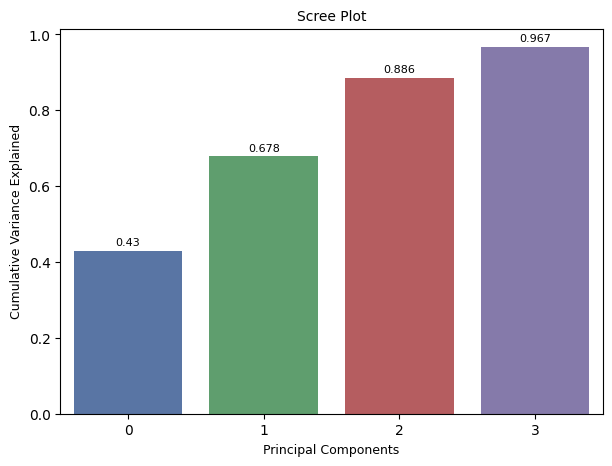

In [ ]:
scree_plotter(decomposer=pca_decomposer)

In [ ]:
X_train_pca = train_df_after_pca.values
X_cv_pca = cv_df_after_pca.values
X_test_pca = test_df_after_pca.values

In [ ]:
from sklearn.metrics import (classification_report,
                             confusion_matrix,
                             log_loss,
                             precision_score,
                             recall_score)

In [ ]:
def plot_heatmap(matrix, title, labels):
    """
    This function plots the heatmap.

    Parameters
    ----------
    `matrix`: 2D array
    `title`: title
    `labels`: integer encoded target values

    Returns none.
    """
    sns.heatmap(data=matrix, annot=True, fmt='.2f', linewidths=0.1,
                xticklabels=labels, yticklabels=labels)
    plt.xlabel(xlabel='Predicted Class')
    plt.ylabel(ylabel='Actual Class')
    plt.title(label=title, fontsize=10)

In [ ]:
def plot_confusion_matrix(y_true, y_pred, labels):
    """
    This function plots:
        1. Confusion matrix
        2. Precision matrix
        3. Recall matrix

    Parameters
    ----------
    `y_true`: ground truth (or actual) values
    `y_pred`: predicted values
    `labels`: integer encoded target values

    Returns none.
    """
    cmat = confusion_matrix(y_true=y_true, y_pred=y_pred, labels=labels)
    pmat = cmat / cmat.sum(axis=0)
    print("Column sum of precision matrix: {}".format(pmat.sum(axis=0)))
    rmat = ((cmat.T) / (cmat.sum(axis=1).T)).T
    print("Row sum of recall matrix:       {}".format(rmat.sum(axis=1)))

    plt.figure(figsize=(15, 3))
    plt.subplot(131)
    plot_heatmap(matrix=cmat, title='Confusion Matrix', labels=labels)
    plt.subplot(132)
    plot_heatmap(matrix=pmat, title='Precision Matrix', labels=labels)
    plt.subplot(133)
    plot_heatmap(matrix=rmat, title='Recall Matrix', labels=labels)
    plt.show()

In [ ]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import LogisticRegression

In [ ]:
def logistic_regresson(X_train,
                       X_cv,
                       X_test,
                       y_train,
                       y_cv,
                       y_test,
                       c_params,
                       cols,
                       model_name,
                       labels=labels):
    """
    This function builds the model.
    """
    if os.path.isdir('/content/drive/MyDrive/stellar/model_dumps'):    #/content/model_dumps   './model_dumps/eda_models'
        pass
    else:

        os.mkdir(path='/content/drive/MyDrive/stellar/model_dumps')    # './model_dumps/eda_models'

    model_path = os.path.join('/content/drive/MyDrive/stellar/model_dumps', model_name) # './model_dumps/eda_models'

    if not os.path.isfile(path=model_path):
        log_error_list = list()
        loss_df = pd.DataFrame()

        for c_i in c_params:
            clf = LogisticRegression(C=c_i, n_jobs=-1, random_state=42,
                                     max_iter=1000)
            clf.fit(X=X_train, y=y_train)

            sig_clf = CalibratedClassifierCV(base_estimator=clf)
            sig_clf.fit(X=X_train, y=y_train)

            cv_pred = sig_clf.predict_proba(X=X_cv)
            cv_l = log_loss(y_true=y_cv, y_pred=cv_pred)
            log_error_list.append(cv_l)

        print("Hyperparameter Tuning")
        loss_df['C'] = c_params
        loss_df['logloss'] = log_error_list
        loss_tb = tabulate(tabular_data=loss_df, headers='keys',
                           tablefmt='pretty')
        print(loss_tb)

        plt.figure(figsize=(6, 4))
        plt.plot(loss_df['C'], loss_df['logloss'], 'go--')
        for i, txt in enumerate(np.round(loss_df['logloss'].values, 3)):
            plt.annotate(text=(c_params[i], txt),
                         xy=(c_params[i], loss_df['logloss'].values[i]))
        plt.title(label='Cross Validation Error vs C')
        plt.xlabel(xlabel='C')
        plt.ylabel(ylabel='Error')
        plt.grid()
        plt.show()

        b_i = np.argmin(a=log_error_list)
        b_c = c_params[b_i]

        clf = LogisticRegression(n_jobs=-1, max_iter=1000, C=b_c,
                                 random_state=42)
        clf.fit(X=X_train, y=y_train)

        sig_clf = CalibratedClassifierCV(base_estimator=clf, method='sigmoid')
        sig_clf.fit(X=X_train, y=y_train)

        with open(file=model_path, mode='wb') as m_pkl:
            pickle.dump(obj=(clf, sig_clf, b_c), file=m_pkl)
        print("Model saved into the disk.")
    else:
        with open(file=model_path, mode='rb') as m_pkl:
            clf, sig_clf, b_c = pickle.load(file=m_pkl)
        print("Loaded the saved model from the disk.")

    train_pred = sig_clf.predict_proba(X=X_train)
    train_loss = log_loss(y_true=y_train, y_pred=train_pred, labels=labels)
    train_loss = np.round(train_loss, 3)
    train_cm_pred = sig_clf.predict(X=X_train)
    print("\nTrain")
    print("Logloss (Train): {} for the best C: {}".format(train_loss, b_c))
    plot_confusion_matrix(y_true=y_train, y_pred=train_cm_pred, labels=labels)
    print(classification_report(y_true=y_train, y_pred=train_cm_pred))

    cv_pred = sig_clf.predict_proba(X=X_cv)
    cv_loss = log_loss(y_true=y_cv, y_pred=cv_pred, labels=labels)
    cv_loss = np.round(cv_loss, 3)
    cv_cm_pred = sig_clf.predict(X=X_cv)
    print("Cross Validation")
    print("Logloss (CV): {} for the best C: {}".format(cv_loss, b_c))
    plot_confusion_matrix(y_true=y_cv, y_pred=cv_cm_pred, labels=labels)
    print(classification_report(y_true=y_cv, y_pred=cv_cm_pred))

    test_pred = sig_clf.predict_proba(X=X_test)
    test_loss = log_loss(y_true=y_test, y_pred=test_pred, labels=labels)
    test_loss = np.round(test_loss, 3)
    test_cm_pred = sig_clf.predict(X=X_test)
    print("Test")
    print("Logloss (Test): {} for the best C: {}".format(test_loss, b_c))
    plot_confusion_matrix(y_true=y_test, y_pred=test_cm_pred, labels=labels)
    print(classification_report(y_true=y_test, y_pred=test_cm_pred))

    feature_imp = clf.coef_

    plt.figure(figsize=(15, 3))
    for i, cls, fi in zip(range(len(labels)), labels, feature_imp):
        plt.subplot(int('13{}'.format(i+1)))
        plt.bar(x=cols, height=fi)
        plt.xticks(rotation=45)
        plt.title(label="Feature Importance: {}".format(cls),
                  fontsize=10)
        plt.grid()
    plt.show()

    return train_loss, cv_loss, test_loss

Loaded the saved model from the disk.

Train
Logloss (Train): 0.319 for the best C: 0.1
Column sum of precision matrix: [1. 1. 1.]
Row sum of recall matrix:       [1. 1. 1.]


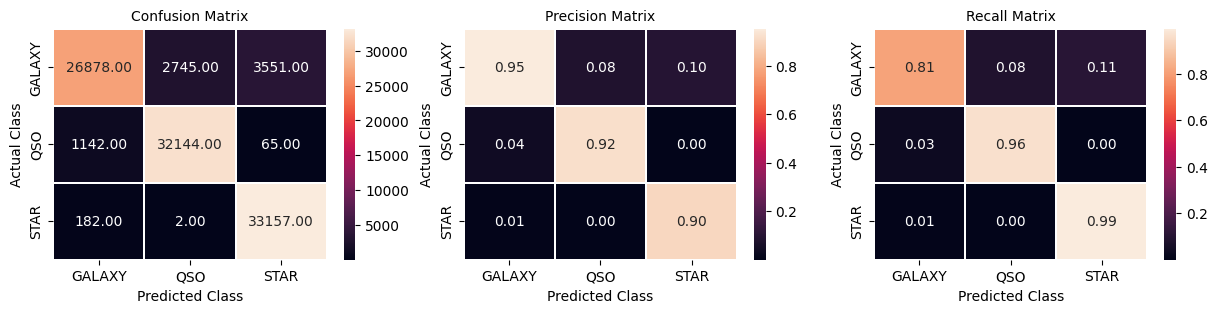

              precision    recall  f1-score   support

      GALAXY       0.95      0.81      0.88     33174
         QSO       0.92      0.96      0.94     33351
        STAR       0.90      0.99      0.95     33341

    accuracy                           0.92     99866
   macro avg       0.93      0.92      0.92     99866
weighted avg       0.93      0.92      0.92     99866

Cross Validation
Logloss (CV): 0.314 for the best C: 0.1
Column sum of precision matrix: [1. 1. 1.]
Row sum of recall matrix:       [1. 1. 1.]


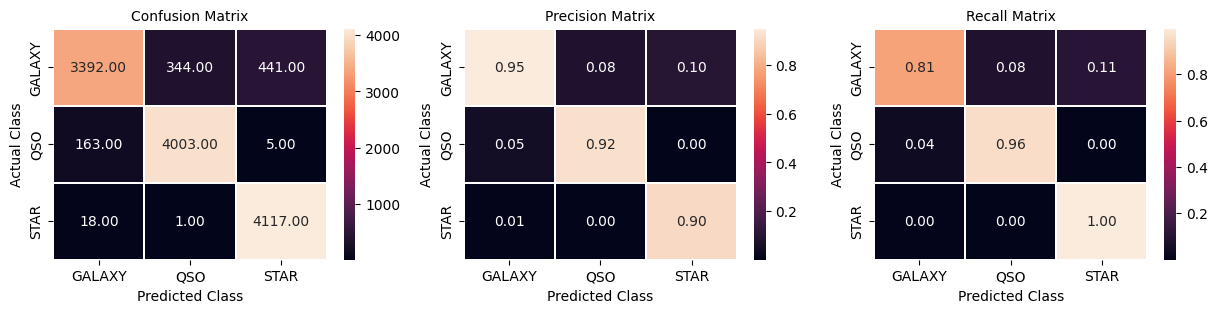

              precision    recall  f1-score   support

      GALAXY       0.95      0.81      0.88      4177
         QSO       0.92      0.96      0.94      4171
        STAR       0.90      1.00      0.95      4136

    accuracy                           0.92     12484
   macro avg       0.92      0.92      0.92     12484
weighted avg       0.92      0.92      0.92     12484

Test
Logloss (Test): 0.317 for the best C: 0.1
Column sum of precision matrix: [1. 1. 1.]
Row sum of recall matrix:       [1. 1. 1.]


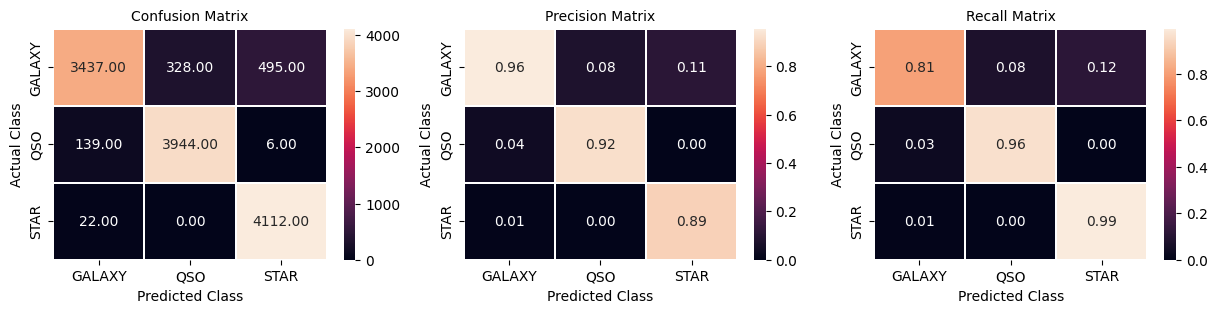

              precision    recall  f1-score   support

      GALAXY       0.96      0.81      0.87      4260
         QSO       0.92      0.96      0.94      4089
        STAR       0.89      0.99      0.94      4134

    accuracy                           0.92     12483
   macro avg       0.92      0.92      0.92     12483
weighted avg       0.92      0.92      0.92     12483



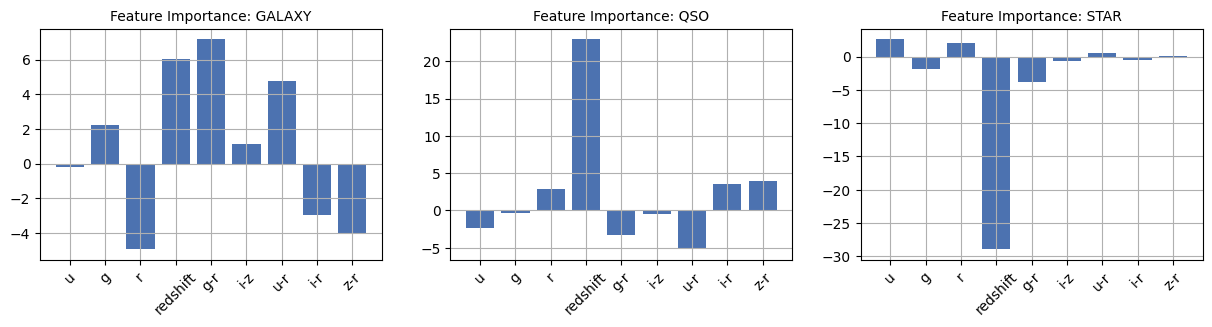

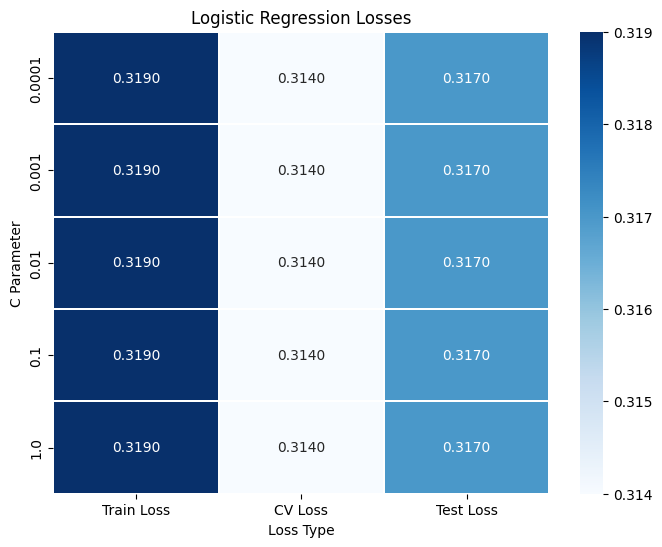

In [ ]:
model_name = 'logistic_regression_fea.pkl'
c_params = [10 ** x for x in range(-4, 1)]

(logreg_tr_loss,
 logreg_cv_loss,
 logreg_te_loss) = logistic_regresson(X_train=X_train_fea,
                                      y_train=y_train,
                                      X_cv=X_cv_fea,
                                      y_cv=y_cv,
                                      X_test=X_test_fea,
                                      y_test=y_test,
                                      c_params=c_params,
                                      cols=fea_cols,
                                      model_name=model_name)

# Create a dataframe to hold the losses
losses_df = pd.DataFrame({
    'Train Loss': logreg_tr_loss,
    'CV Loss': logreg_cv_loss,
    'Test Loss': logreg_te_loss
}, index=c_params)

# Create the heatmap using the 'Blues' colormap
plt.figure(figsize=(8, 6))
sns.heatmap(losses_df, annot=True, fmt='.4f', linewidths=0.1, cmap='Blues')
plt.title('Logistic Regression Losses')
plt.xlabel('Loss Type')
plt.ylabel('C Parameter')
plt.show()


In [ ]:
os.getcwd()

'/content/drive/.shortcut-targets-by-id/10w78KTznZw72rd0hzdnNIkB6YBXjzLqP/stellar/stellar-classification-dataset-sdss17'

Loaded the saved model from the disk.

Train
Logloss (Train): 0.533 for the best C: 0.1
Column sum of precision matrix: [1. 1. 1.]
Row sum of recall matrix:       [1. 1. 1.]


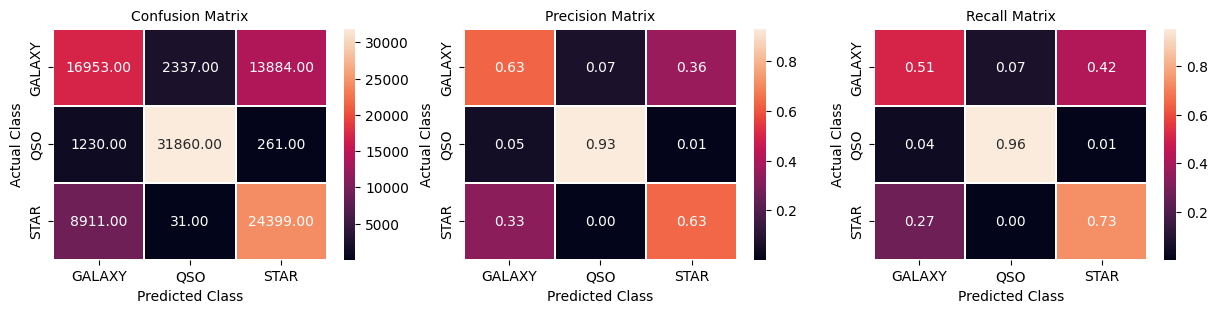

              precision    recall  f1-score   support

      GALAXY       0.63      0.51      0.56     33174
         QSO       0.93      0.96      0.94     33351
        STAR       0.63      0.73      0.68     33341

    accuracy                           0.73     99866
   macro avg       0.73      0.73      0.73     99866
weighted avg       0.73      0.73      0.73     99866

Cross Validation
Logloss (CV): 0.528 for the best C: 0.1
Column sum of precision matrix: [1. 1. 1.]
Row sum of recall matrix:       [1. 1. 1.]


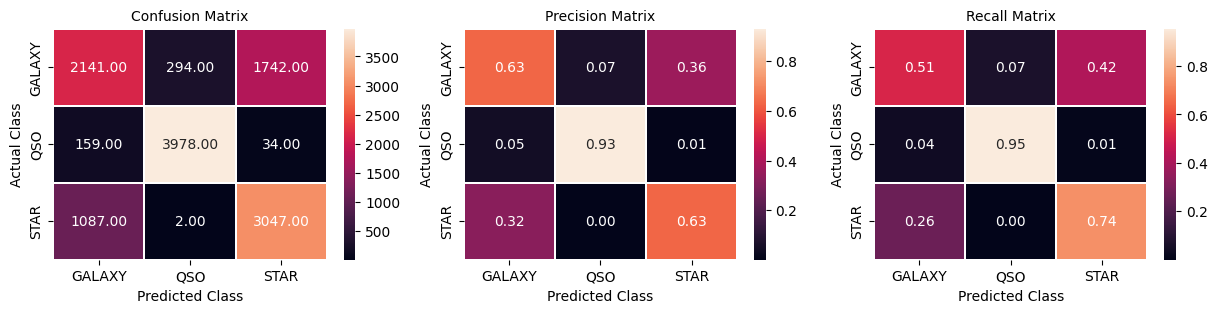

              precision    recall  f1-score   support

      GALAXY       0.63      0.51      0.57      4177
         QSO       0.93      0.95      0.94      4171
        STAR       0.63      0.74      0.68      4136

    accuracy                           0.73     12484
   macro avg       0.73      0.73      0.73     12484
weighted avg       0.73      0.73      0.73     12484

Test
Logloss (Test): 0.537 for the best C: 0.1
Column sum of precision matrix: [1. 1. 1.]
Row sum of recall matrix:       [1. 1. 1.]


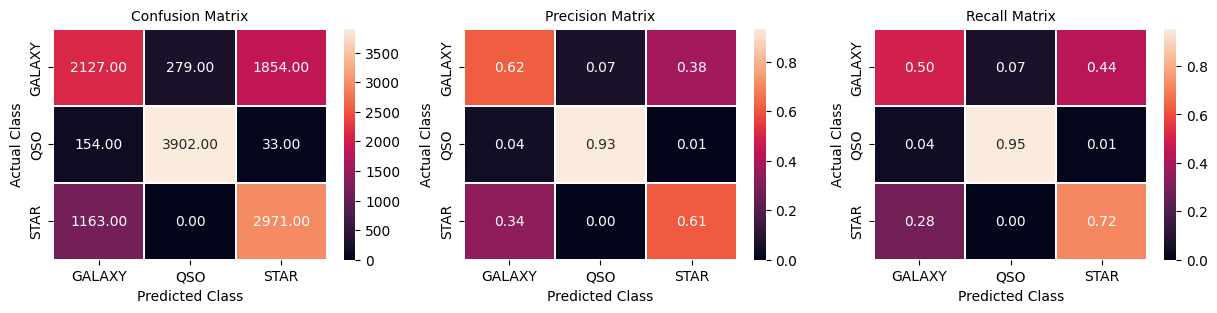

              precision    recall  f1-score   support

      GALAXY       0.62      0.50      0.55      4260
         QSO       0.93      0.95      0.94      4089
        STAR       0.61      0.72      0.66      4134

    accuracy                           0.72     12483
   macro avg       0.72      0.72      0.72     12483
weighted avg       0.72      0.72      0.72     12483



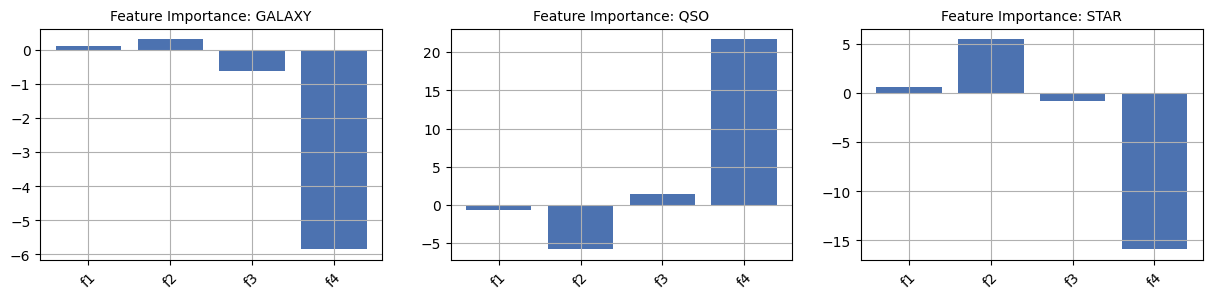

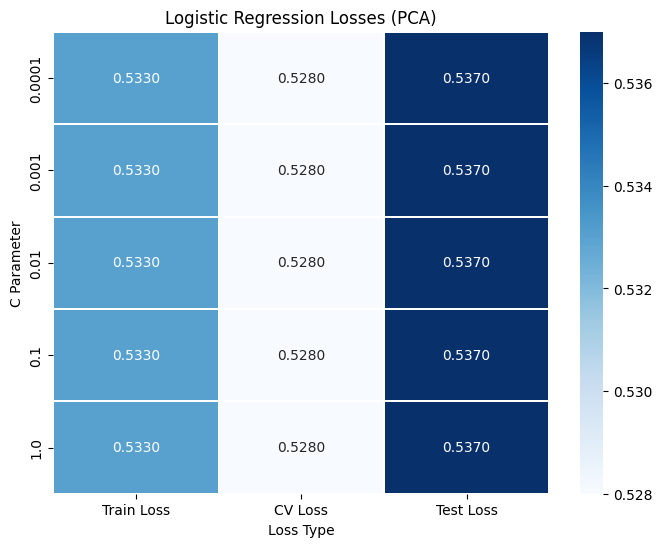

In [ ]:
model_name = 'logistic_regression_pca.pkl'
c_params = [10 ** x for x in range(-4, 1)]

(logreg_tr_loss_pca,
 logreg_cv_loss_pca,
 logreg_te_loss_pca) = logistic_regresson(X_train=X_train_pca,
                                          y_train=y_train,
                                          X_cv=X_cv_pca,
                                          y_cv=y_cv,
                                          X_test=X_test_pca,
                                          y_test=y_test,
                                          c_params=c_params,
                                          cols=pca_cols,
                                          model_name=model_name)

# Create a dataframe to hold the losses
losses_df_pca = pd.DataFrame({
    'Train Loss': logreg_tr_loss_pca,
    'CV Loss': logreg_cv_loss_pca,
    'Test Loss': logreg_te_loss_pca
}, index=c_params)

# Create the heatmap using the 'Blues' colormap
plt.figure(figsize=(8, 6))
sns.heatmap(losses_df_pca, annot=True, fmt='.4f', linewidths=0.1, cmap='Blues')
plt.title('Logistic Regression Losses (PCA)')
plt.xlabel('Loss Type')
plt.ylabel('C Parameter')
plt.show()


In [ ]:
train_df_fea_pca = pd.concat(objs=[train_df_fea, train_df_after_pca], axis=1)
cv_df_fea_pca = pd.concat(objs=[cv_df_fea, cv_df_after_pca], axis=1)
test_df_fea_pca = pd.concat(objs=[test_df_fea, test_df_after_pca], axis=1)

In [ ]:
fea_pca_cols = fea_cols + pca_cols
print(fea_pca_cols)

['u', 'g', 'r', 'redshift', 'g-r', 'i-z', 'u-r', 'i-r', 'z-r', 'f1', 'f2', 'f3', 'f4']


In [ ]:
X_train_fea_pca = train_df_fea_pca[fea_pca_cols].values
X_cv_fea_pca = cv_df_fea_pca[fea_pca_cols].values
X_test_fea_pca = test_df_fea_pca[fea_pca_cols].values

Loaded the saved model from the disk.

Train
Logloss (Train): 0.342 for the best C: 0.1
Column sum of precision matrix: [1. 1. 1.]
Row sum of recall matrix:       [1. 1. 1.]


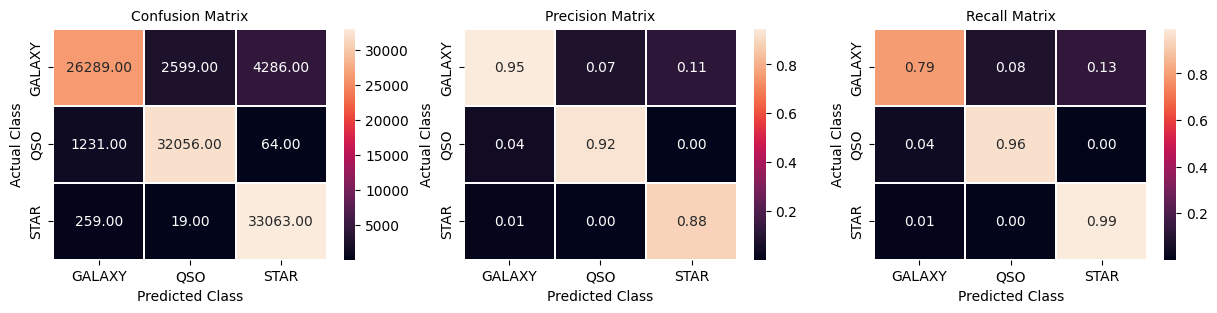

              precision    recall  f1-score   support

      GALAXY       0.95      0.79      0.86     33174
         QSO       0.92      0.96      0.94     33351
        STAR       0.88      0.99      0.93     33341

    accuracy                           0.92     99866
   macro avg       0.92      0.92      0.91     99866
weighted avg       0.92      0.92      0.91     99866

Cross Validation
Logloss (CV): 0.338 for the best C: 0.1
Column sum of precision matrix: [1. 1. 1.]
Row sum of recall matrix:       [1. 1. 1.]


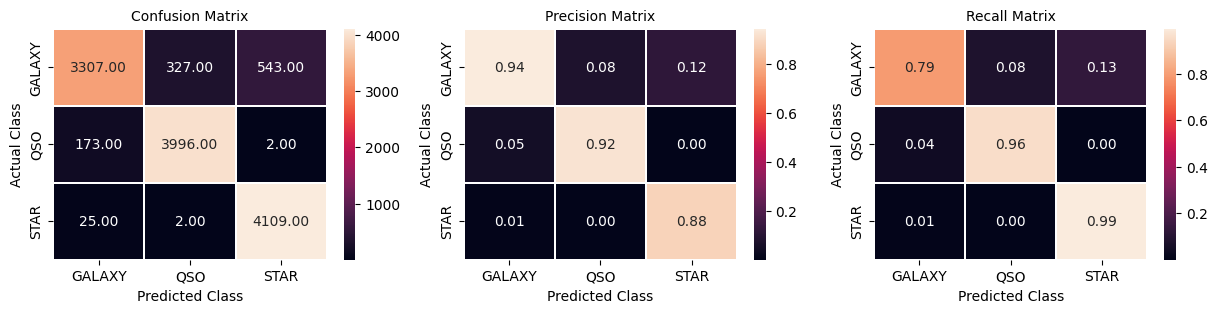

              precision    recall  f1-score   support

      GALAXY       0.94      0.79      0.86      4177
         QSO       0.92      0.96      0.94      4171
        STAR       0.88      0.99      0.93      4136

    accuracy                           0.91     12484
   macro avg       0.92      0.91      0.91     12484
weighted avg       0.92      0.91      0.91     12484

Test
Logloss (Test): 0.341 for the best C: 0.1
Column sum of precision matrix: [1. 1. 1.]
Row sum of recall matrix:       [1. 1. 1.]


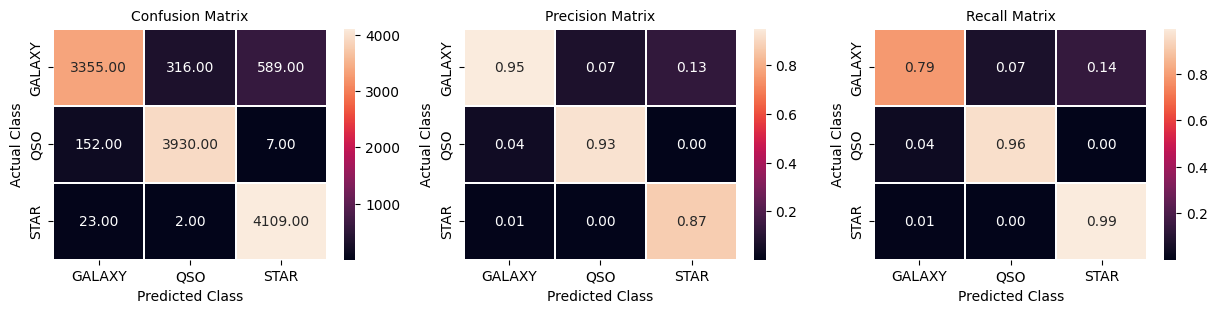

              precision    recall  f1-score   support

      GALAXY       0.95      0.79      0.86      4260
         QSO       0.93      0.96      0.94      4089
        STAR       0.87      0.99      0.93      4134

    accuracy                           0.91     12483
   macro avg       0.92      0.91      0.91     12483
weighted avg       0.92      0.91      0.91     12483



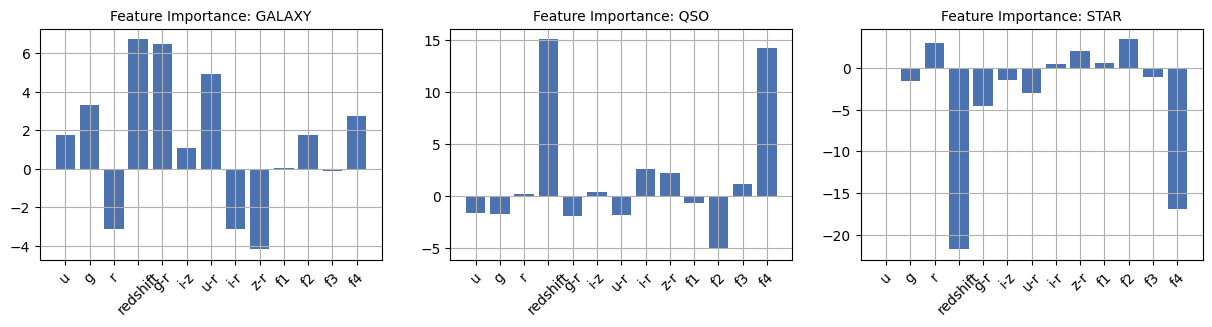

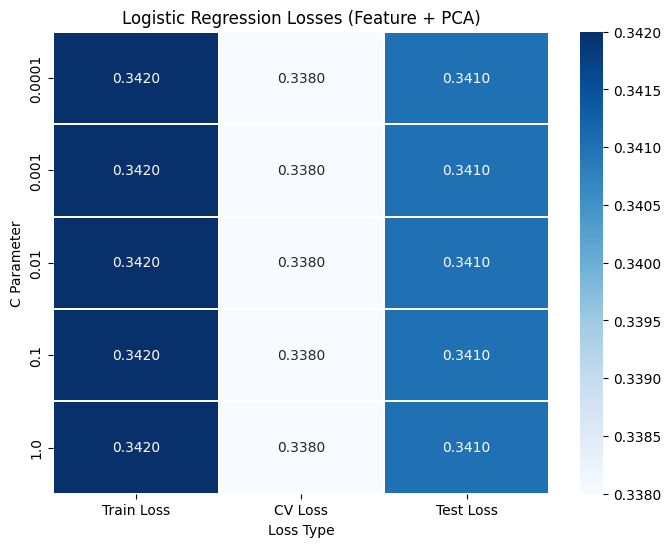

In [ ]:
model_name = 'logistic_regression_fea_pca.pkl'
c_params = [10 ** x for x in range(-4, 1)]

(logreg_tr_loss_fea_pca,
 logreg_cv_loss_fea_pca,
 logreg_te_loss_fea_pca) = logistic_regresson(X_train=X_train_fea_pca,
                                              y_train=y_train,
                                              X_cv=X_cv_fea_pca,
                                              y_cv=y_cv,
                                              X_test=X_test_fea_pca,
                                              y_test=y_test,
                                              c_params=c_params,
                                              cols=fea_pca_cols,
                                              model_name=model_name)

# Create a dataframe to hold the losses
losses_df_fea_pca = pd.DataFrame({
    'Train Loss': logreg_tr_loss_fea_pca,
    'CV Loss': logreg_cv_loss_fea_pca,
    'Test Loss': logreg_te_loss_fea_pca
}, index=c_params)

# Create the heatmap using the 'Blues' colormap
plt.figure(figsize=(8, 6))
sns.heatmap(losses_df_fea_pca, annot=True, fmt='.4f', linewidths=0.1, cmap='Blues')
plt.title('Logistic Regression Losses (Feature + PCA)')
plt.xlabel('Loss Type')
plt.ylabel('C Parameter')
plt.show()

In [ ]:
def export_data(data, target_arr, filename):
    """
    This function exports the data.

    Parameters
    ----------
    `data`: dataframe
    `filename`: the filename that data will be exported to
    """
    if os.path.isdir('/content/drive/MyDrive/stellar/model_dumps/data'):
        pass
    else:
        os.mkdir(path='/content/drive/MyDrive/stellar/model_dumps/data')

    data['class'] = target_arr
    data.to_csv(path_or_buf=os.path.join('/content/drive/MyDrive/stellar/model_dumps/data', filename), index=None)
    print("The data is exported to '{}'.".format(filename))

In [ ]:
export_data(data=train_df_fea[fea_cols], target_arr=y_train,
            filename='train_fea.csv')

The data is exported to 'train_fea.csv'.


In [ ]:
export_data(data=cv_df_fea[fea_cols], target_arr=y_cv,
            filename='cv_fea.csv')

The data is exported to 'cv_fea.csv'.


In [ ]:
export_data(data=test_df_fea[fea_cols], target_arr=y_test,
            filename='test_fea.csv')

The data is exported to 'test_fea.csv'.


In [ ]:
export_data(data=test_df_fea[imp_cols], target_arr=y_test,
            filename='test_data.csv')

The data is exported to 'test_data.csv'.


Modeling

In [ ]:
tr_fea_df = pd.read_csv(filepath_or_buffer='/content/drive/MyDrive/stellar/model_dumps/data/train_fea.csv')
cv_fea_df = pd.read_csv(filepath_or_buffer='/content/drive/MyDrive/stellar/model_dumps/data/cv_fea.csv')
te_fea_df = pd.read_csv(filepath_or_buffer='/content/drive/MyDrive/stellar/model_dumps/data/test_fea.csv')

In [ ]:
fea_cols = list(tr_fea_df.columns)
target = fea_cols.pop()
print(fea_cols)
print(target)

['u', 'g', 'r', 'redshift', 'g-r', 'i-z', 'u-r', 'i-r', 'z-r']
class


In [ ]:
labels = cv_fea_df['class'].unique()
print(labels)

['GALAXY' 'QSO' 'STAR']


In [ ]:
X_train = tr_fea_df[fea_cols].values
y_train = tr_fea_df[target].values

In [ ]:
X_cv = cv_fea_df[fea_cols].values
y_cv = cv_fea_df[target].values

In [ ]:
X_test = te_fea_df[fea_cols].values
y_test = te_fea_df[target].values

In [ ]:
print(X_train.shape, y_train.shape)
print(X_cv.shape, y_cv.shape)
print(X_test.shape, y_test.shape)

(99866, 9) (99866,)
(12484, 9) (12484,)
(12483, 9) (12483,)


Confusion, Precision, and Recall matrices

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
def plot_heatmap(matrix, title, labels):
    """
    This function plots the heatmap.

    Parameters
    ----------
    `matrix`: 2D array
    `title`: title
    `labels`: target values

    Returns none.
    """
    sns.heatmap(data=matrix, annot=True, fmt='.2f', linewidths=0.1,
                xticklabels=labels, yticklabels=labels)
    plt.xlabel(xlabel='Predicted Class')
    plt.ylabel(ylabel='Actual Class')
    plt.title(label=title, fontsize=10)

In [ ]:
def plot_confusion_matrix(y_true, y_pred, labels):
    """
    This function plots:
        1. Confusion matrix
        2. Precision matrix
        3. Recall matrix

    Parameters
    ----------
    `y_true`: ground truth (or actual) values
    `y_pred`: predicted values
    `labels`: target values

    Returns none.
    """
    cmat = confusion_matrix(y_true=y_true, y_pred=y_pred, labels=labels)
    pmat = cmat / cmat.sum(axis=0)
    print("Column sum of precision matrix: {}".format(pmat.sum(axis=0)))
    rmat = ((cmat.T) / (cmat.sum(axis=1).T)).T
    print("Row sum of recall matrix:       {}".format(rmat.sum(axis=1)))

    plt.figure(figsize=(15, 3))
    plt.subplot(131)
    plot_heatmap(matrix=cmat, title='Confusion Matrix', labels=labels)
    plt.subplot(132)
    plot_heatmap(matrix=pmat, title='Precision Matrix', labels=labels)
    plt.subplot(133)
    plot_heatmap(matrix=rmat, title='Recall Matrix', labels=labels)
    plt.show()

In [ ]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import log_loss

In [ ]:
def reporter(clf, X, y, title, labels, best=None):
    """
    This functions generates the report.

    Parameters
    ----------
    `clf`: classifier object
    `X`: features
    `y`: target
    `title`: title of the report
    `labels`: target values
    `best`: best parameters which are learned

    Returns logloss.
    """
    pred = clf.predict_proba(X=X)

    loss = log_loss(y_true=y, y_pred=pred)
    loss = np.round(a=loss, decimals=3)

    cm_pred = clf.predict(X=X)

    print(title)
    if best is None:
        print("Logloss: {}".format(loss))
    else:
        print("Logloss: {}".format(loss))
        print("Best parameters: {}".format(best))

    plot_confusion_matrix(y_true=y, y_pred=cm_pred, labels=labels)

    print(classification_report(y_true=y, y_pred=cm_pred))
    print("Accuracy:",accuracy_score(y,cm_pred))
    return loss

Modeling

4.1. RandomizedSearchCV for hyperparameter tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
def tuner(clf, dist, X, y):
    """
    This function tunes the hyperparameters.

    Parameters
    ----------
    `clf`: estimator object
    `dist`: hyperparameters to be tuned
    `X`: features
    `y`: target

    Returns the best values for hyperparameters.
    """
    rs_clf = RandomizedSearchCV(estimator=clf, random_state=0, n_jobs=-1,
                                param_distributions=dist)
    search = rs_clf.fit(X=X, y=y)
    return search.best_params_

In [ ]:
def get_model_path(model_name):
    """
    This function gets the model path.

    Parameter
    ---------
    `model_name`: name of the model

    Returns path of the model.
    """
    if os.path.isdir('/content/drive/MyDrive/stellar/model_dumps'):
        pass
    else:
        os.mkdir(path='/content/drive/MyDrive/stellar/model_dumps')

    model_path = os.path.join('/content/drive/MyDrive/stellar/model_dumps', model_name)
    return model_path

In [ ]:
from sklearn.dummy import DummyClassifier

In [ ]:
def dummy_classifier(X_train,
                     y_train,
                     X_cv,
                     y_cv,
                     X_test,
                     y_test,
                     model_name,
                     labels=labels):
    """
    A random or dummy model.
    """
    model_path = get_model_path(model_name=model_name)

    if not os.path.isfile(path=model_path):
        clf = DummyClassifier(strategy='uniform')
        clf.fit(X=X_train, y=y_train)

        with open(file=model_path, mode='wb') as m_pkl:
            pickle.dump(obj=clf, file=m_pkl)
        print("Model saved into the disk.\n")
    else:
        with open(file=model_path, mode='rb') as m_pkl:
            clf = pickle.load(file=m_pkl)
        print("Loaded the saved model from the disk.\n")

    tr_loss = reporter(clf=clf, X=X_train, y=y_train,
                       title='Train', labels=labels)
    cv_loss = reporter(clf=clf, X=X_cv, y=y_cv,
                       title='Cross Validation', labels=labels)
    te_loss = reporter(clf=clf, X=X_test, y=y_test,
                       title='Test', labels=labels)

    return tr_loss, cv_loss, te_loss

Loaded the saved model from the disk.

Train
Logloss: 1.099
Column sum of precision matrix: [1. 1. 1.]
Row sum of recall matrix:       [1. 1. 1.]


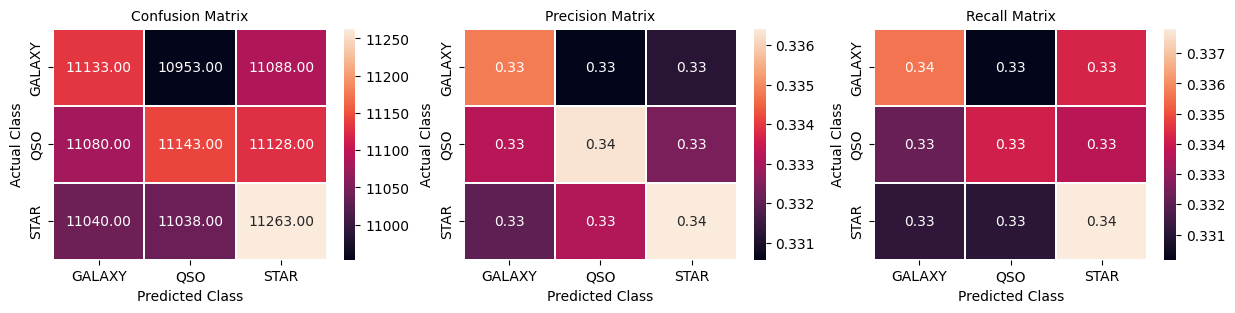

              precision    recall  f1-score   support

      GALAXY       0.33      0.34      0.34     33174
         QSO       0.34      0.33      0.34     33351
        STAR       0.34      0.34      0.34     33341

    accuracy                           0.34     99866
   macro avg       0.34      0.34      0.34     99866
weighted avg       0.34      0.34      0.34     99866

Accuracy: 0.33584002563435
Cross Validation
Logloss: 1.099
Column sum of precision matrix: [1. 1. 1.]
Row sum of recall matrix:       [1. 1. 1.]


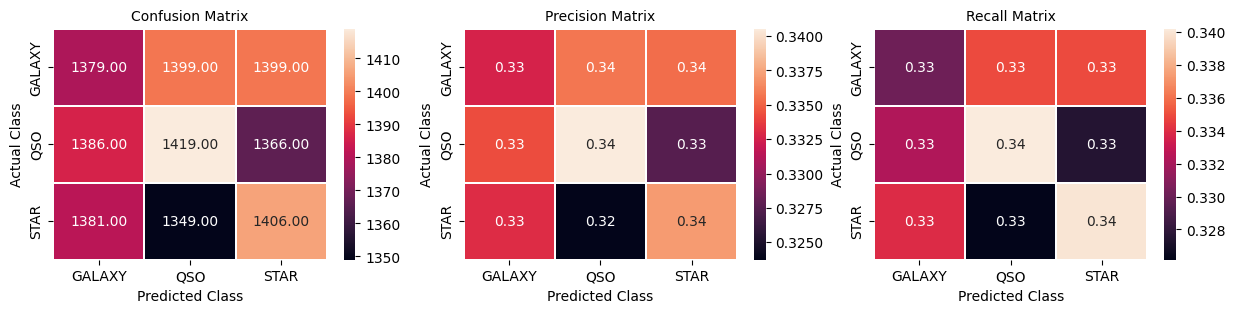

              precision    recall  f1-score   support

      GALAXY       0.33      0.33      0.33      4177
         QSO       0.34      0.34      0.34      4171
        STAR       0.34      0.34      0.34      4136

    accuracy                           0.34     12484
   macro avg       0.34      0.34      0.34     12484
weighted avg       0.34      0.34      0.34     12484

Accuracy: 0.3367510413329061
Test
Logloss: 1.099
Column sum of precision matrix: [1. 1. 1.]
Row sum of recall matrix:       [1. 1. 1.]


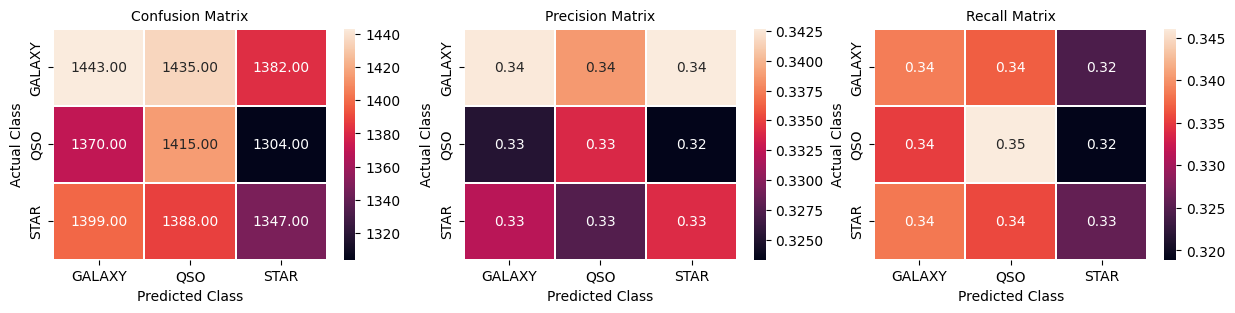

              precision    recall  f1-score   support

      GALAXY       0.34      0.34      0.34      4260
         QSO       0.33      0.35      0.34      4089
        STAR       0.33      0.33      0.33      4134

    accuracy                           0.34     12483
   macro avg       0.34      0.34      0.34     12483
weighted avg       0.34      0.34      0.34     12483

Accuracy: 0.3368581270527918


In [ ]:
model_name = 'model_dummy_classifier.pkl'

(dummy_tr_loss,
 dummy_cv_loss,
 dummy_te_loss) = dummy_classifier(X_train=X_train,
                                   y_train=y_train,
                                   X_cv=X_cv,
                                   y_cv=y_cv,
                                   X_test=X_test,
                                   y_test=y_test,
                                   model_name=model_name)

In [ ]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import LogisticRegression

In [ ]:
def logistic_regresson(X_train,
                       y_train,
                       X_cv,
                       y_cv,
                       X_test,
                       y_test,
                       dist,
                       model_name,
                       labels=labels):
    """
    This function builds the logistic regression model.
    """
    model_path = get_model_path(model_name=model_name)

    if not os.path.isfile(path=model_path):
        clf = LogisticRegression(n_jobs=-1, random_state=42, max_iter=1000,
                                 class_weight='balanced')

        best = tuner(clf=clf, dist=dist, X=X_train, y=y_train)

        clf = LogisticRegression(n_jobs=-1, max_iter=1000, C=best['C'],
                                 random_state=42, penalty=best['penalty'],
                                 class_weight='balanced')
        clf.fit(X=X_train, y=y_train)

        sig_clf = CalibratedClassifierCV(base_estimator=clf)
        sig_clf.fit(X=X_train, y=y_train)

        with open(file=model_path, mode='wb') as m_pkl:
            pickle.dump(obj=(clf, sig_clf, best), file=m_pkl)
        print("Model saved into the disk.\n")
    else:
        with open(file=model_path, mode='rb') as m_pkl:
            clf, sig_clf, best = pickle.load(file=m_pkl)
        print("Loaded the saved model from the disk.\n")

    tr_loss = reporter(clf=sig_clf, X=X_train, y=y_train,
                       title='Train', best=best, labels=labels)
    cv_loss = reporter(clf=sig_clf, X=X_cv, y=y_cv,
                       title='Cross Validation', best=best, labels=labels)
    te_loss = reporter(clf=sig_clf, X=X_test, y=y_test,
                       title='Test', best=best, labels=labels)

    return best, tr_loss, cv_loss, te_loss


Loaded the saved model from the disk.

Train
Logloss: 0.328
Best parameters: {'penalty': 'l2', 'C': 10}
Column sum of precision matrix: [1. 1. 1.]
Row sum of recall matrix:       [1. 1. 1.]


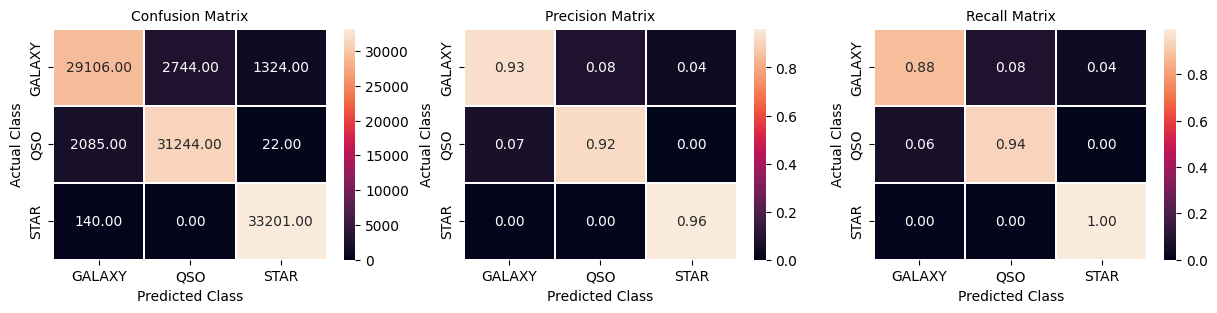

              precision    recall  f1-score   support

      GALAXY       0.93      0.88      0.90     33174
         QSO       0.92      0.94      0.93     33351
        STAR       0.96      1.00      0.98     33341

    accuracy                           0.94     99866
   macro avg       0.94      0.94      0.94     99866
weighted avg       0.94      0.94      0.94     99866

Accuracy: 0.9367652654557107
Cross Validation
Logloss: 0.327
Best parameters: {'penalty': 'l2', 'C': 10}
Column sum of precision matrix: [1. 1. 1.]
Row sum of recall matrix:       [1. 1. 1.]


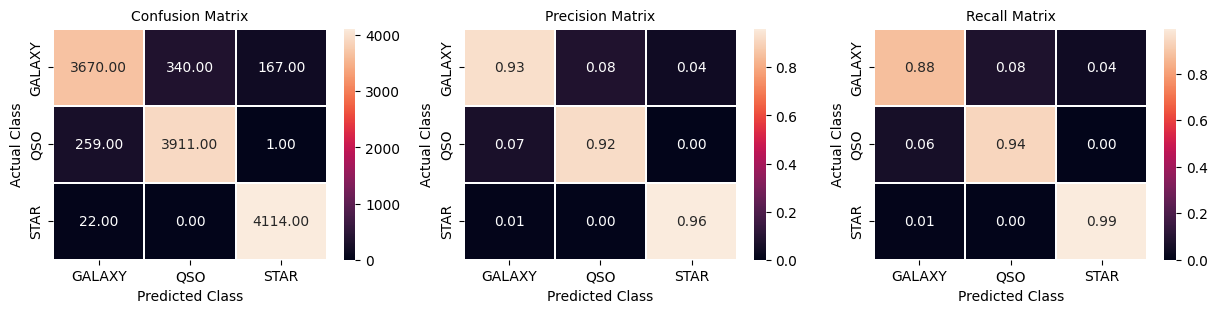

              precision    recall  f1-score   support

      GALAXY       0.93      0.88      0.90      4177
         QSO       0.92      0.94      0.93      4171
        STAR       0.96      0.99      0.98      4136

    accuracy                           0.94     12484
   macro avg       0.94      0.94      0.94     12484
weighted avg       0.94      0.94      0.94     12484

Accuracy: 0.9367991028516501
Test
Logloss: 0.324
Best parameters: {'penalty': 'l2', 'C': 10}
Column sum of precision matrix: [1. 1. 1.]
Row sum of recall matrix:       [1. 1. 1.]


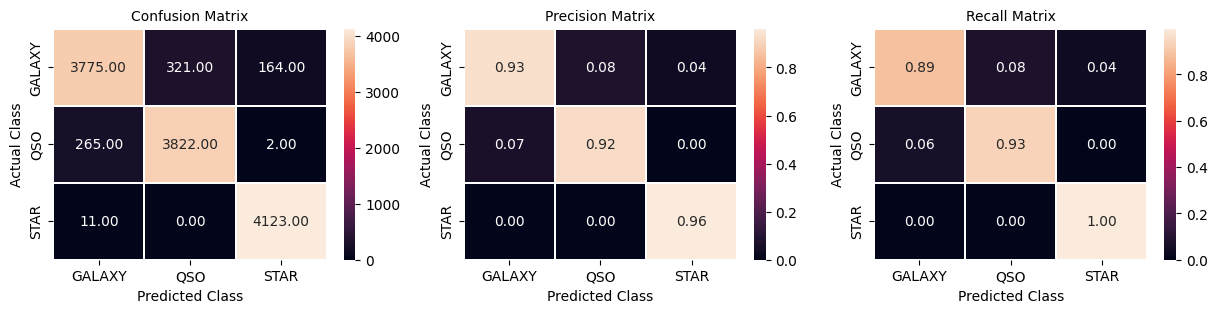

              precision    recall  f1-score   support

      GALAXY       0.93      0.89      0.91      4260
         QSO       0.92      0.93      0.93      4089
        STAR       0.96      1.00      0.98      4134

    accuracy                           0.94     12483
   macro avg       0.94      0.94      0.94     12483
weighted avg       0.94      0.94      0.94     12483

Accuracy: 0.9388768725466634


In [ ]:
model_name = 'model_logistic_regression.pkl'

dist = dict(C=[10 ** x for x in range(-4, 3)], penalty=['l2', 'l1'])

(logreg_best,
 logreg_tr_loss,
 logreg_cv_loss,
 logreg_te_loss) = logistic_regresson(X_train=X_train,
                                      y_train=y_train,
                                      X_cv=X_cv,
                                      y_cv=y_cv,
                                      X_test=X_test,
                                      y_test=y_test,
                                      dist=dist,
                                      model_name=model_name)

In [ ]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import SVC

In [ ]:
def support_vector_classifier(X_train,
                              y_train,
                              X_cv,
                              y_cv,
                              X_test,
                              y_test,
                              dist,
                              model_name,
                              labels=labels):
    """
    This function builds the support vector classifier model.
    """
    model_path = get_model_path(model_name=model_name)

    if not os.path.isfile(path=model_path):
        clf = SVC(random_state=42, class_weight='balanced')

        best = tuner(clf=clf, dist=dist, X=X_train, y=y_train)

        clf = SVC(C=best['C'], random_state=42, class_weight='balanced')
        clf.fit(X=X_train, y=y_train)

        sig_clf = CalibratedClassifierCV(base_estimator=clf)
        sig_clf.fit(X=X_train, y=y_train)

        with open(file=model_path, mode='wb') as m_pkl:
            pickle.dump(obj=(clf, sig_clf, best), file=m_pkl)
        print("Model saved into the disk.\n")
    else:
        with open(file=model_path, mode='rb') as m_pkl:
            clf, sig_clf, best = pickle.load(file=m_pkl)
        print("Loaded the saved model from the disk.\n")

    tr_loss = reporter(clf=sig_clf, X=X_train, y=y_train,
                       title='Train', best=best, labels=labels)
    cv_loss = reporter(clf=sig_clf, X=X_cv, y=y_cv,
                       title='Cross Validation', best=best, labels=labels)
    te_loss = reporter(clf=sig_clf, X=X_test, y=y_test,
                       title='Test', best=best, labels=labels)

    return best, tr_loss, cv_loss, te_loss

Loaded the saved model from the disk.

Train
Logloss: 0.114
Best parameters: {'C': 100}
Column sum of precision matrix: [1. 1. 1.]
Row sum of recall matrix:       [1. 1. 1.]


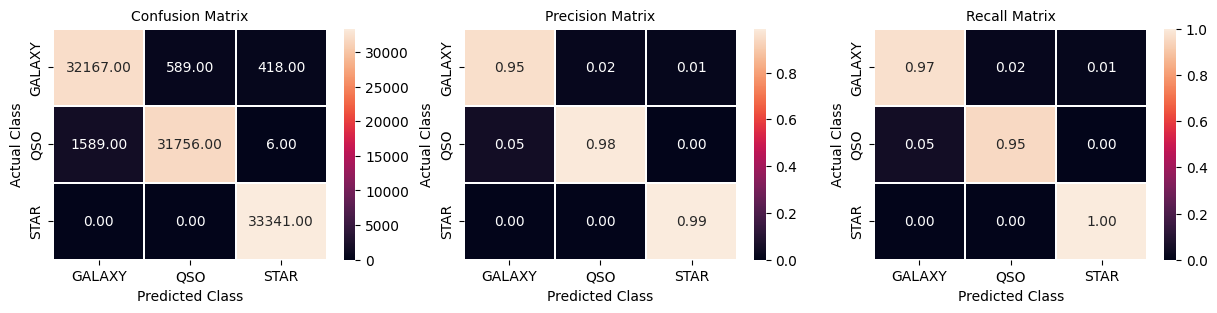

              precision    recall  f1-score   support

      GALAXY       0.95      0.97      0.96     33174
         QSO       0.98      0.95      0.97     33351
        STAR       0.99      1.00      0.99     33341

    accuracy                           0.97     99866
   macro avg       0.97      0.97      0.97     99866
weighted avg       0.97      0.97      0.97     99866

Accuracy: 0.9739450864157971
Cross Validation
Logloss: 0.114
Best parameters: {'C': 100}
Column sum of precision matrix: [1. 1. 1.]
Row sum of recall matrix:       [1. 1. 1.]


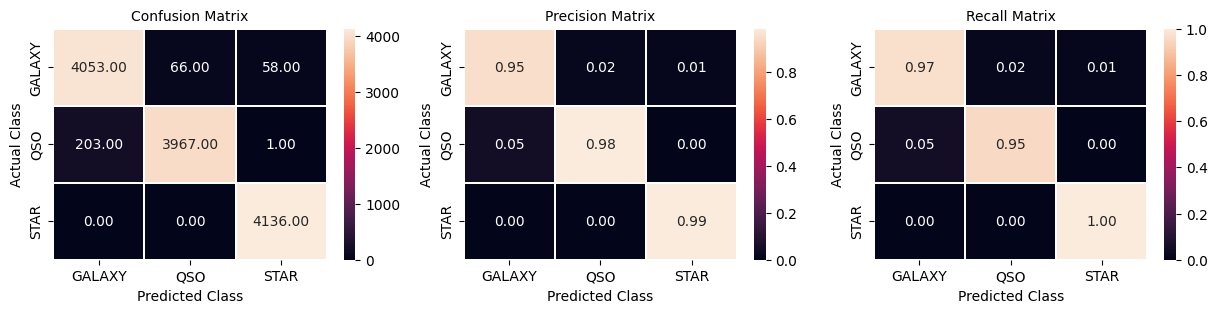

              precision    recall  f1-score   support

      GALAXY       0.95      0.97      0.96      4177
         QSO       0.98      0.95      0.97      4171
        STAR       0.99      1.00      0.99      4136

    accuracy                           0.97     12484
   macro avg       0.97      0.97      0.97     12484
weighted avg       0.97      0.97      0.97     12484

Accuracy: 0.9737263697532842
Test
Logloss: 0.109
Best parameters: {'C': 100}
Column sum of precision matrix: [1. 1. 1.]
Row sum of recall matrix:       [1. 1. 1.]


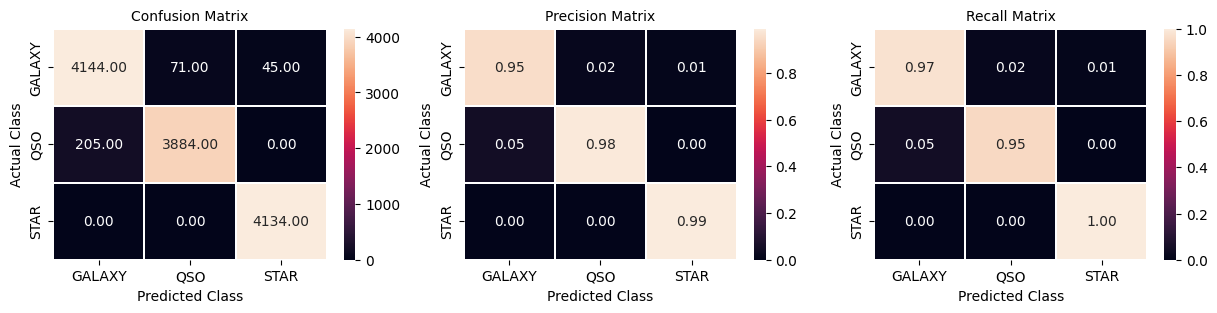

              precision    recall  f1-score   support

      GALAXY       0.95      0.97      0.96      4260
         QSO       0.98      0.95      0.97      4089
        STAR       0.99      1.00      0.99      4134

    accuracy                           0.97     12483
   macro avg       0.97      0.97      0.97     12483
weighted avg       0.97      0.97      0.97     12483

Accuracy: 0.9742850276375871


In [ ]:
model_name = 'model_support_vector_classifier.pkl'

dist = dict(C=[10 ** x for x in range(-4, 3)])

(svc_best,
 svc_tr_loss,
 svc_cv_loss,
 svc_te_loss) = support_vector_classifier(X_train=X_train,
                                          y_train=y_train,
                                          X_cv=X_cv,
                                          y_cv=y_cv,
                                          X_test=X_test,
                                          y_test=y_test,
                                          dist=dist,
                                          model_name=model_name)

In [ ]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
def k_neighbors_classifier(X_train,
                           y_train,
                           X_cv,
                           y_cv,
                           X_test,
                           y_test,
                           dist,
                           model_name,
                           labels=labels):
    """
    This function builds the k neighbors classifier.
    """
    model_path = get_model_path(model_name=model_name)

    if not os.path.isfile(path=model_path):
        clf = KNeighborsClassifier(n_jobs=-1)

        best = tuner(clf=clf, dist=dist, X=X_train, y=y_train)

        clf = KNeighborsClassifier(n_jobs=-1, n_neighbors=best['n_neighbors'])
        clf.fit(X=X_train, y=y_train)

        sig_clf = CalibratedClassifierCV(base_estimator=clf)
        sig_clf.fit(X=X_train, y=y_train)

        with open(file=model_path, mode='wb') as m_pkl:
            pickle.dump(obj=(clf, sig_clf, best), file=m_pkl)
        print("Model saved into the disk.\n")
    else:
        with open(file=model_path, mode='rb') as m_pkl:
            clf, sig_clf, best = pickle.load(file=m_pkl)
        print("Loaded the saved model from the disk.\n")

    tr_loss = reporter(clf=sig_clf, X=X_train, y=y_train,
                       title='Train', best=best, labels=labels)
    cv_loss = reporter(clf=sig_clf, X=X_cv, y=y_cv,
                       title='Cross Validation', best=best, labels=labels)
    te_loss = reporter(clf=sig_clf, X=X_test, y=y_test,
                       title='Test', best=best, labels=labels)

    return best, tr_loss, cv_loss, te_loss

Loaded the saved model from the disk.

Train
Logloss: 0.061
Best parameters: {'n_neighbors': 3}
Column sum of precision matrix: [1. 1. 1.]
Row sum of recall matrix:       [1. 1. 1.]


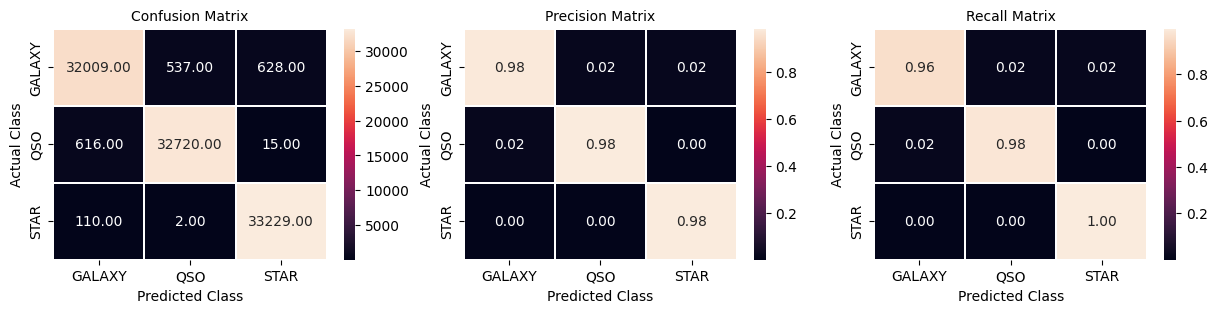

              precision    recall  f1-score   support

      GALAXY       0.98      0.96      0.97     33174
         QSO       0.98      0.98      0.98     33351
        STAR       0.98      1.00      0.99     33341

    accuracy                           0.98     99866
   macro avg       0.98      0.98      0.98     99866
weighted avg       0.98      0.98      0.98     99866

Accuracy: 0.980894398493982
Cross Validation
Logloss: 0.105
Best parameters: {'n_neighbors': 3}
Column sum of precision matrix: [1. 1. 1.]
Row sum of recall matrix:       [1. 1. 1.]


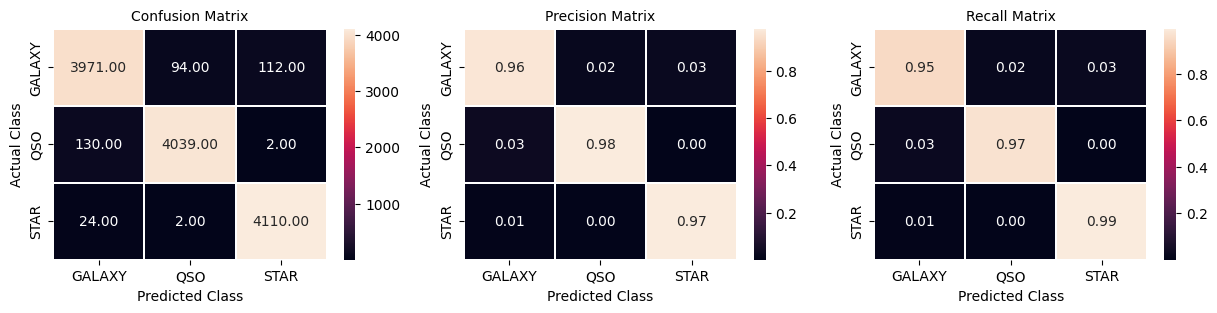

              precision    recall  f1-score   support

      GALAXY       0.96      0.95      0.96      4177
         QSO       0.98      0.97      0.97      4171
        STAR       0.97      0.99      0.98      4136

    accuracy                           0.97     12484
   macro avg       0.97      0.97      0.97     12484
weighted avg       0.97      0.97      0.97     12484

Accuracy: 0.9708426786286447
Test
Logloss: 0.107
Best parameters: {'n_neighbors': 3}
Column sum of precision matrix: [1. 1. 1.]
Row sum of recall matrix:       [1. 1. 1.]


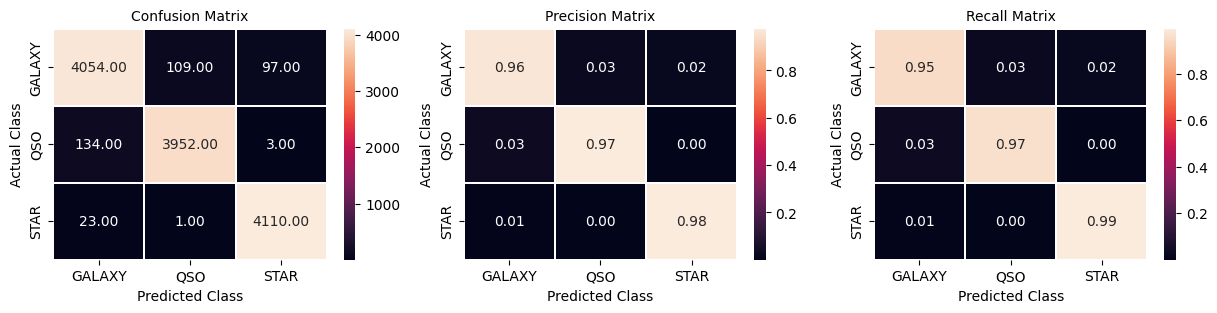

              precision    recall  f1-score   support

      GALAXY       0.96      0.95      0.96      4260
         QSO       0.97      0.97      0.97      4089
        STAR       0.98      0.99      0.99      4134

    accuracy                           0.97     12483
   macro avg       0.97      0.97      0.97     12483
weighted avg       0.97      0.97      0.97     12483

Accuracy: 0.9706000160217896


In [ ]:
model_name = 'model_k_neighbors_classifier.pkl'

dist = dict(n_neighbors=[3, 5, 11, 15, 21, 31, 41, 51, 99])

(knn_best,
 knn_tr_loss,
 knn_cv_loss,
 knn_te_loss) = k_neighbors_classifier(X_train=X_train,
                                       y_train=y_train,
                                       X_cv=X_cv,
                                       y_cv=y_cv,
                                       X_test=X_test,
                                       y_test=y_test,
                                       dist=dist,
                                       model_name=model_name)

In [ ]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.tree import DecisionTreeClassifier

In [ ]:
def decision_tree_classifier(X_train,
                             y_train,
                             X_cv,
                             y_cv,
                             X_test,
                             y_test,
                             dist,
                             model_name,
                             labels=labels):
    """
    This function builds the decision tree classifier.
    """
    model_path = get_model_path(model_name=model_name)

    if not os.path.isfile(path=model_path):
        clf = DecisionTreeClassifier(random_state=42)

        best = tuner(clf=clf, dist=dist, X=X_train, y=y_train)

        clf = DecisionTreeClassifier(criterion=best['criterion'],
                                     max_depth=best['max_depth'],
                                     min_samples_split=best['min_samples_split'],
                                     random_state=42)
        clf.fit(X=X_train, y=y_train)

        sig_clf = CalibratedClassifierCV(base_estimator=clf)
        sig_clf.fit(X=X_train, y=y_train)

        with open(file=model_path, mode='wb') as m_pkl:
            pickle.dump(obj=(clf, sig_clf, best), file=m_pkl)
        print("Model saved into the disk.\n")
    else:
        with open(file=model_path, mode='rb') as m_pkl:
            clf, sig_clf, best = pickle.load(file=m_pkl)
        print("Loaded the saved model from the disk.\n")

    tr_loss = reporter(clf=sig_clf, X=X_train, y=y_train,
                       title='Train', best=best, labels=labels)
    cv_loss = reporter(clf=sig_clf, X=X_cv, y=y_cv,
                       title='Cross Validation', best=best, labels=labels)
    te_loss = reporter(clf=sig_clf, X=X_test, y=y_test,
                       title='Test', best=best, labels=labels)

    return best, tr_loss, cv_loss, te_loss

Loaded the saved model from the disk.

Train
Logloss: 0.056
Best parameters: {'min_samples_split': 100, 'max_depth': 100, 'criterion': 'gini'}
Column sum of precision matrix: [1. 1. 1.]
Row sum of recall matrix:       [1. 1. 1.]


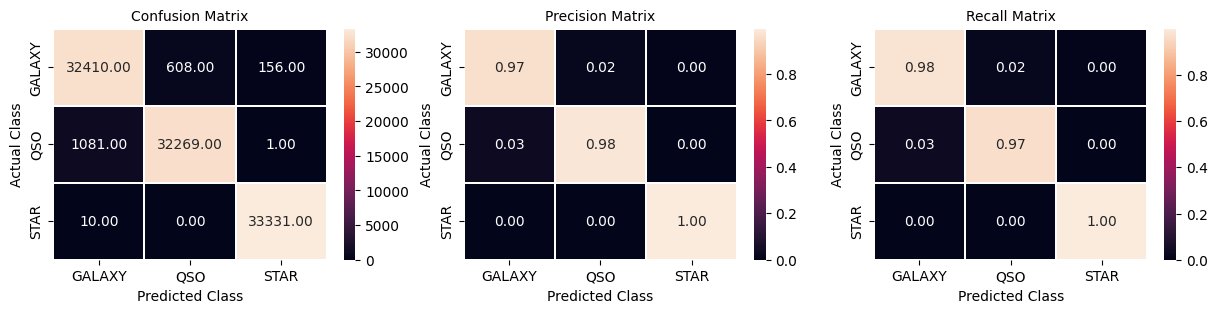

              precision    recall  f1-score   support

      GALAXY       0.97      0.98      0.97     33174
         QSO       0.98      0.97      0.97     33351
        STAR       1.00      1.00      1.00     33341

    accuracy                           0.98     99866
   macro avg       0.98      0.98      0.98     99866
weighted avg       0.98      0.98      0.98     99866

Accuracy: 0.9814150962289467
Cross Validation
Logloss: 0.073
Best parameters: {'min_samples_split': 100, 'max_depth': 100, 'criterion': 'gini'}
Column sum of precision matrix: [1. 1. 1.]
Row sum of recall matrix:       [1. 1. 1.]


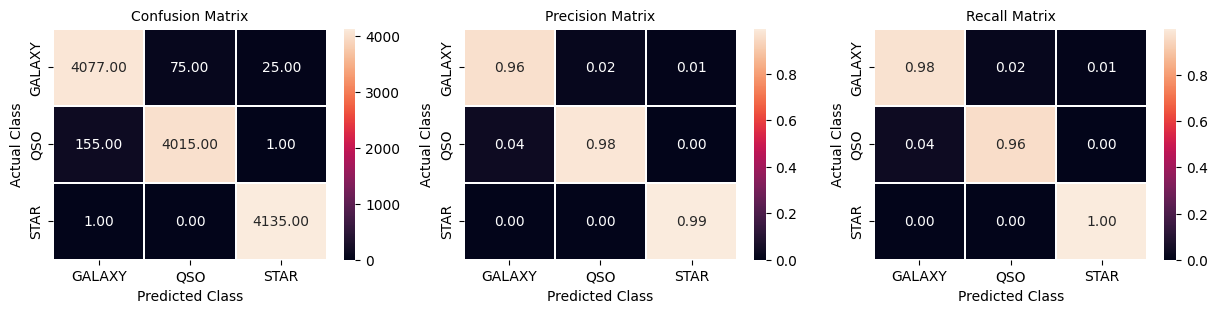

              precision    recall  f1-score   support

      GALAXY       0.96      0.98      0.97      4177
         QSO       0.98      0.96      0.97      4171
        STAR       0.99      1.00      1.00      4136

    accuracy                           0.98     12484
   macro avg       0.98      0.98      0.98     12484
weighted avg       0.98      0.98      0.98     12484

Accuracy: 0.9794136494713233
Test
Logloss: 0.075
Best parameters: {'min_samples_split': 100, 'max_depth': 100, 'criterion': 'gini'}
Column sum of precision matrix: [1. 1. 1.]
Row sum of recall matrix:       [1. 1. 1.]


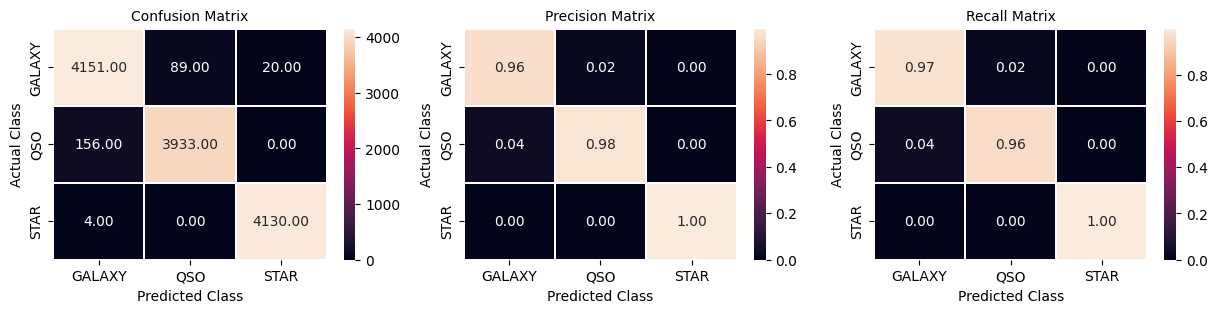

              precision    recall  f1-score   support

      GALAXY       0.96      0.97      0.97      4260
         QSO       0.98      0.96      0.97      4089
        STAR       1.00      1.00      1.00      4134

    accuracy                           0.98     12483
   macro avg       0.98      0.98      0.98     12483
weighted avg       0.98      0.98      0.98     12483

Accuracy: 0.9784506929424016


In [ ]:
model_name = 'model_decision_tree_classifier.pkl'

dist = dict(criterion=['gini', 'entropy', 'log_loss'],
            max_depth=[1, 5, 10, 50, 100],
            min_samples_split=[5, 10, 100, 250, 500])

(dt_best,
 dt_tr_loss,
 dt_cv_loss,
 dt_te_loss) = decision_tree_classifier(X_train=X_train,
                                        y_train=y_train,
                                        X_cv=X_cv,
                                        y_cv=y_cv,
                                        X_test=X_test,
                                        y_test=y_test,
                                        dist=dist,
                                        model_name=model_name)

In [ ]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.ensemble import RandomForestClassifier

In [ ]:
def feature_importance_plot(data, x, y, title):
    """
    This function plots the feature importance plot.

    Parameters
    ----------
    `data`: dataframe
    `x`: x-axis
    `y`: y-axis
    `title`: title of the plot

    Returns none.
    """
    bars = sns.barplot(data=data, x=x, y=y)
    for b in bars.patches:
        x = b.get_x() + (b.get_width() / 2)
        y = np.round(b.get_height(), 3)
        bars.annotate(text=format(y),
                      xy=(x, y), ha='center', va='center', size=8,
                      xytext=(0, 6), textcoords='offset points')
    plt.title(label=title)

In [ ]:
def random_forest_classifier(X_train,
                             y_train,
                             X_cv,
                             y_cv,
                             X_test,
                             y_test,
                             dist,
                             model_name,
                             labels=labels,
                             plot_fi=False):
    """
    This function builds the random forest classifier.
    """
    model_path = get_model_path(model_name=model_name)

    if not os.path.isfile(path=model_path):
        clf = RandomForestClassifier(n_jobs=-1, random_state=42)

        best = tuner(clf=clf, dist=dist, X=X_train, y=y_train)

        clf = RandomForestClassifier(n_estimators=best['n_estimators'],
                                     criterion=best['criterion'],
                                     max_depth=best['max_depth'],
                                     min_samples_split=best['min_samples_split'],
                                     n_jobs=-1, random_state=42)
        clf.fit(X=X_train, y=y_train)

        sig_clf = CalibratedClassifierCV(base_estimator=clf)
        sig_clf.fit(X=X_train, y=y_train)

        with open(file=model_path, mode='wb') as m_pkl:
            pickle.dump(obj=(clf, sig_clf, best), file=m_pkl)
        print("Model saved into the disk.\n")
    else:
        with open(file=model_path, mode='rb') as m_pkl:
            clf, sig_clf, best = pickle.load(file=m_pkl)
        print("Loaded the saved model from the disk.\n")

    if plot_fi:
        imp_df = pd.DataFrame()
        imp_df['Features'] = fea_cols
        imp_df['Importance'] = clf.feature_importances_
        imp_df = imp_df.sort_values(by=['Importance'], ascending=False)
        imp_df['Cumulative'] = np.cumsum(a=imp_df['Importance'].values)

        plt.figure(figsize=(15, 5))
        plt.subplot(121)
        feature_importance_plot(data=imp_df, x='Features', y='Importance',
                                title='Feature Importace')
        plt.subplot(122)
        feature_importance_plot(data=imp_df, x='Features', y='Cumulative',
                                title='Cumulative Feature Importance')
        plt.show()
    else:
        pass

    tr_loss = reporter(clf=sig_clf, X=X_train, y=y_train,
                       title='Train', best=best, labels=labels)
    cv_loss = reporter(clf=sig_clf, X=X_cv, y=y_cv,
                       title='Cross Validation', best=best, labels=labels)
    te_loss = reporter(clf=sig_clf, X=X_test, y=y_test,
                       title='Test', best=best, labels=labels)

    return best, tr_loss, cv_loss, te_loss

Loaded the saved model from the disk.



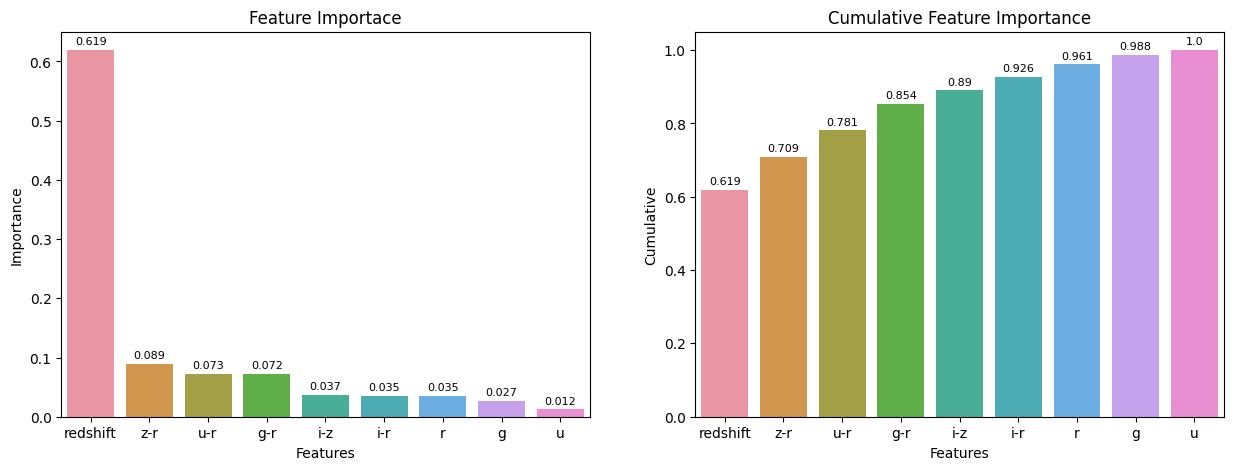

Train
Logloss: 0.018
Best parameters: {'n_estimators': 250, 'min_samples_split': 5, 'max_depth': 100, 'criterion': 'log_loss'}
Column sum of precision matrix: [1. 1. 1.]
Row sum of recall matrix:       [1. 1. 1.]


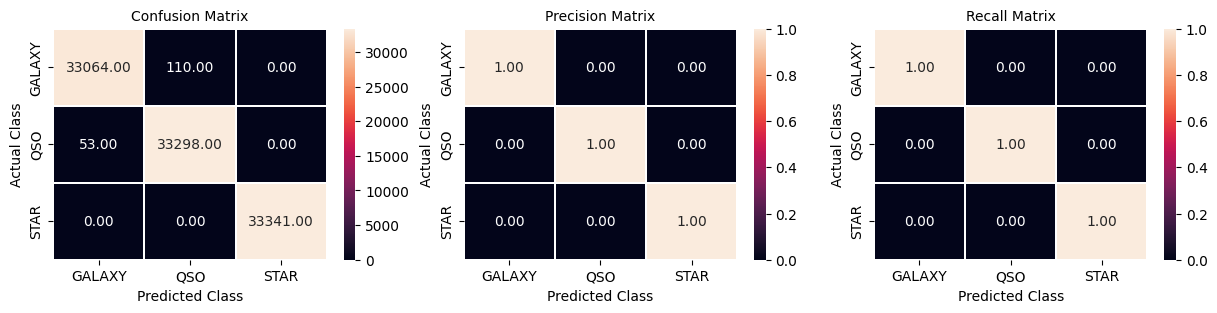

              precision    recall  f1-score   support

      GALAXY       1.00      1.00      1.00     33174
         QSO       1.00      1.00      1.00     33351
        STAR       1.00      1.00      1.00     33341

    accuracy                           1.00     99866
   macro avg       1.00      1.00      1.00     99866
weighted avg       1.00      1.00      1.00     99866

Accuracy: 0.9983678128692448
Cross Validation
Logloss: 0.062
Best parameters: {'n_estimators': 250, 'min_samples_split': 5, 'max_depth': 100, 'criterion': 'log_loss'}
Column sum of precision matrix: [1. 1. 1.]
Row sum of recall matrix:       [1. 1. 1.]


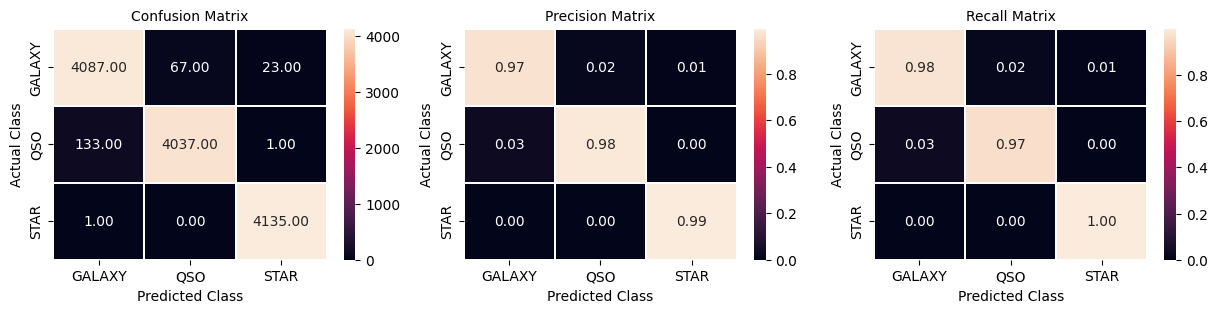

              precision    recall  f1-score   support

      GALAXY       0.97      0.98      0.97      4177
         QSO       0.98      0.97      0.98      4171
        STAR       0.99      1.00      1.00      4136

    accuracy                           0.98     12484
   macro avg       0.98      0.98      0.98     12484
weighted avg       0.98      0.98      0.98     12484

Accuracy: 0.9819769304710029
Test
Logloss: 0.061
Best parameters: {'n_estimators': 250, 'min_samples_split': 5, 'max_depth': 100, 'criterion': 'log_loss'}
Column sum of precision matrix: [1. 1. 1.]
Row sum of recall matrix:       [1. 1. 1.]


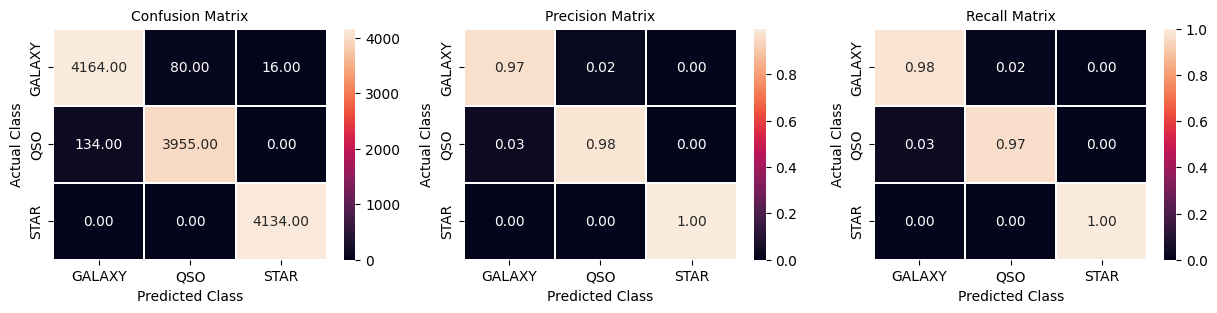

              precision    recall  f1-score   support

      GALAXY       0.97      0.98      0.97      4260
         QSO       0.98      0.97      0.97      4089
        STAR       1.00      1.00      1.00      4134

    accuracy                           0.98     12483
   macro avg       0.98      0.98      0.98     12483
weighted avg       0.98      0.98      0.98     12483

Accuracy: 0.9815749419210126


In [ ]:
model_name = 'model_random_forest_classifier.pkl'

dist = dict(n_estimators=[5, 10, 25, 50, 100, 200, 250, 500, 1000],
            criterion=['gini', 'entropy', 'log_loss'],
            max_depth=[1, 5, 10, 25, 50, 100, 150],
            min_samples_split=[1, 5, 10, 25, 50, 100, 250, 500])

(rf_best,
 rf_tr_loss,
 rf_cv_loss,
 rf_te_loss) = random_forest_classifier(X_train=X_train,
                                        y_train=y_train,
                                        X_cv=X_cv,
                                        y_cv=y_cv,
                                        X_test=X_test,
                                        y_test=y_test,
                                        dist=dist,
                                        model_name=model_name,
                                        plot_fi=True)

In [ ]:
fi_cols = ['redshift', 'g-r', 'i-z', 'u-r', 'i-r', 'z-r', 'g']

In [ ]:
fi_tr_data = tr_fea_df[fi_cols]
fi_cv_data = cv_fea_df[fi_cols]
fi_te_data = te_fea_df[fi_cols]

In [ ]:
def export_data(data, target_arr, filename):
    """
    This function exports the data.

    Parameters
    ----------
    `data`: dataframe
    `filename`: the filename that data will be exported to
    """
    if os.path.isdir('/content/drive/MyDrive/stellar/model_dumps/data'):
        pass
    #else:
        #os.mkdir(path='/content/drive/MyDrive/stellar/model_dumps/data/fi_data')

    data['class'] = target_arr
    data.to_csv(path_or_buf=os.path.join('/content/drive/MyDrive/stellar/model_dumps/data', filename), index=None)
    print("The data is exported to '{}'.".format(filename))

In [ ]:
export_data(data=fi_tr_data, target_arr=y_train, filename='fi_tr_data.csv')

The data is exported to 'fi_tr_data.csv'.


In [ ]:
export_data(data=fi_cv_data, target_arr=y_cv, filename='fi_cv_data.csv')

The data is exported to 'fi_cv_data.csv'.


In [ ]:
export_data(data=fi_te_data, target_arr=y_test, filename='fi_te_data.csv')

The data is exported to 'fi_te_data.csv'.


In [ ]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier

In [ ]:
# def encode_targets(y_train, y_cv, y_test, labels):
#     """
#     This function encodes the targets.

#     Parameters
#     ----------
#     `y_train`: targets in train set
#     `y_cv`: targets in cross validation set
#     `y_test`: targets in test set
#     `labels`: target values

#     Returns a tuple of encoded target sets.
#     """
#     encoder = LabelEncoder()

#     y_train = encoder.fit_transform(y=y_train)
#     y_cv = encoder.transform(y=y_cv)
#     y_test = encoder.transform(y=y_test)

#     labels = encoder.transform(y=labels)

#     return y_train, y_cv, y_test, labels

In [ ]:
from sklearn.preprocessing import LabelEncoder

def encode_targets(y_train, y_cv, y_test, labels):
    """
    This function encodes the targets.

    Parameters
    ----------
    `y_train`: targets in the train set
    `y_cv`: targets in the cross-validation set
    `y_test`: targets in the test set
    `labels`: target values

    Returns a tuple of encoded target sets.
    """
    encoder = LabelEncoder()

    y_train = encoder.fit_transform(y_train)
    y_cv = encoder.transform(y_cv)
    y_test = encoder.transform(y_test)

    labels = encoder.transform(labels)

    return y_train, y_cv, y_test, labels


In [ ]:
def xgb_classifier(X_train,
                   y_train,
                   X_cv,
                   y_cv,
                   X_test,
                   y_test,
                   dist,
                   model_name,
                   labels=labels):
    """
    This function builds the xgb classifier.
    """
    model_path = get_model_path(model_name=model_name)

    (y_train, y_cv,
     y_test, labels) = encode_targets(y_train=y_train, y_cv=y_cv,
                                      y_test=y_test, labels=labels)

    if not os.path.isfile(path=model_path):
        clf = XGBClassifier(n_jobs=-1, random_state=42)

        best = tuner(clf=clf, dist=dist, X=X_train, y=y_train)

        clf = XGBClassifier(n_estimators=best['n_estimators'],
                            max_depth=best['max_depth'],
                            n_jobs=-1, random_state=42)
        clf.fit(X=X_train, y=y_train)

        sig_clf = CalibratedClassifierCV(base_estimator=clf)
        sig_clf.fit(X=X_train, y=y_train)

        with open(file=model_path, mode='wb') as m_pkl:
            pickle.dump(obj=(clf, sig_clf, best), file=m_pkl)
        print("Model saved into the disk.\n")
    else:
        with open(file=model_path, mode='rb') as m_pkl:
            clf, sig_clf, best = pickle.load(file=m_pkl)
        print("Loaded the saved model from the disk.\n")

    tr_loss = reporter(clf=sig_clf, X=X_train, y=y_train,
                       title='Train', best=best, labels=labels)
    cv_loss = reporter(clf=sig_clf, X=X_cv, y=y_cv,
                       title='Cross Validation', best=best, labels=labels)
    te_loss = reporter(clf=sig_clf, X=X_test, y=y_test,
                       title='Test', best=best, labels=labels)

    return best, tr_loss, cv_loss, te_loss

Loaded the saved model from the disk.

Train
Logloss: 0.017
Best parameters: {'n_estimators': 50, 'max_depth': 25}
Column sum of precision matrix: [1. 1. 1.]
Row sum of recall matrix:       [1. 1. 1.]


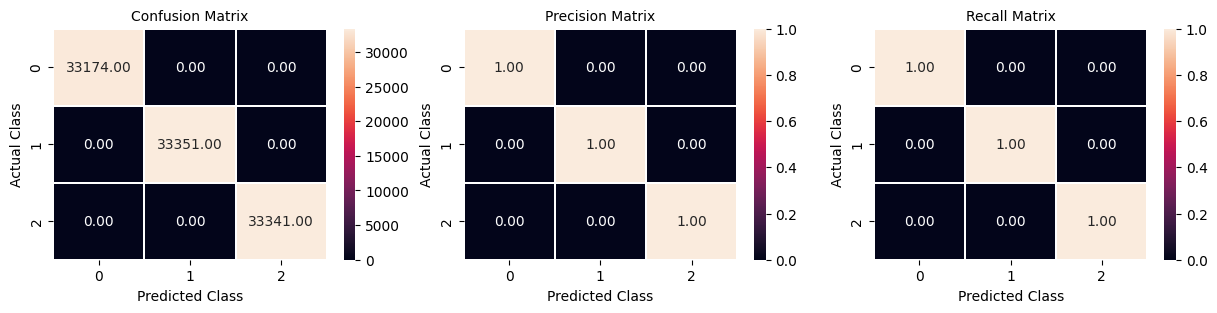

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     33174
           1       1.00      1.00      1.00     33351
           2       1.00      1.00      1.00     33341

    accuracy                           1.00     99866
   macro avg       1.00      1.00      1.00     99866
weighted avg       1.00      1.00      1.00     99866

Accuracy: 1.0
Cross Validation
Logloss: 0.067
Best parameters: {'n_estimators': 50, 'max_depth': 25}
Column sum of precision matrix: [1. 1. 1.]
Row sum of recall matrix:       [1. 1. 1.]


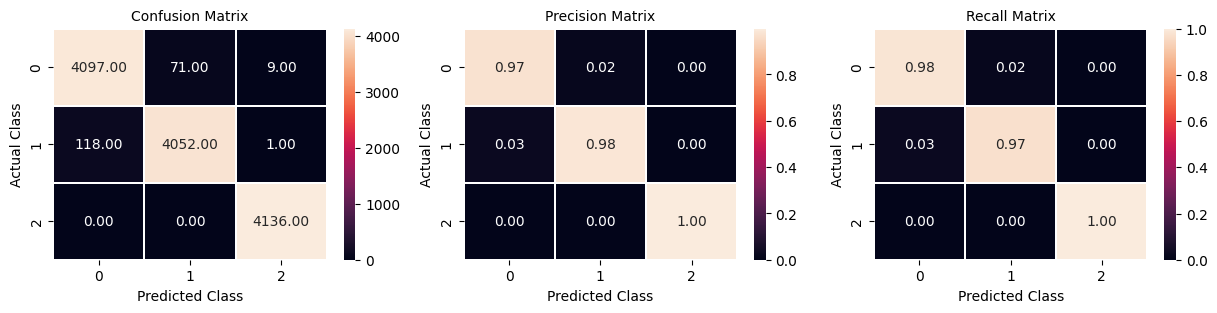

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      4177
           1       0.98      0.97      0.98      4171
           2       1.00      1.00      1.00      4136

    accuracy                           0.98     12484
   macro avg       0.98      0.98      0.98     12484
weighted avg       0.98      0.98      0.98     12484

Accuracy: 0.9840595962832426
Test
Logloss: 0.068
Best parameters: {'n_estimators': 50, 'max_depth': 25}
Column sum of precision matrix: [1. 1. 1.]
Row sum of recall matrix:       [1. 1. 1.]


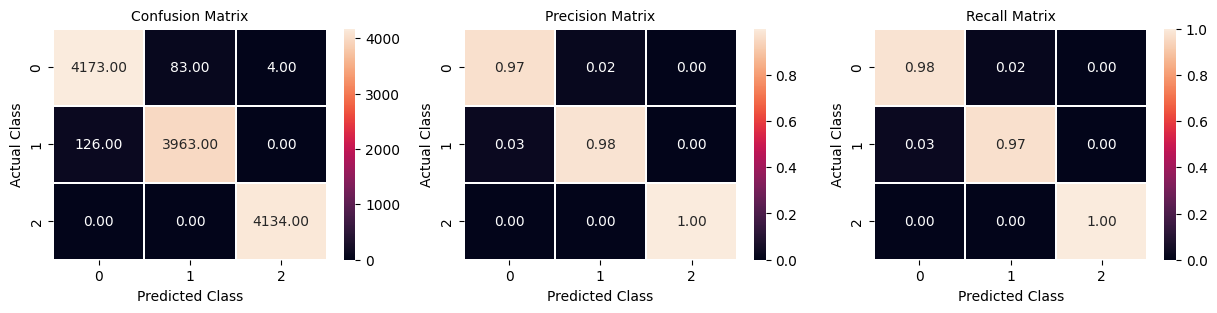

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      4260
           1       0.98      0.97      0.97      4089
           2       1.00      1.00      1.00      4134

    accuracy                           0.98     12483
   macro avg       0.98      0.98      0.98     12483
weighted avg       0.98      0.98      0.98     12483

Accuracy: 0.9829367940398942


In [ ]:
model_name = 'fi_model_xgb_classifier.pkl'

dist = dict(n_estimators=[5, 10, 25, 50, 100],
            max_depth=[1, 5, 10, 25])

(xgbc_best,
 xgbc_tr_loss,
 xgbc_cv_loss,
 xgbc_te_loss) = xgb_classifier(X_train=X_train,
                                y_train=y_train,
                                X_cv=X_cv,
                                y_cv=y_cv,
                                X_test=X_test,
                                y_test=y_test,
                                dist=dist,
                                model_name=model_name)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
def adaboost_classifier(X_train,
                        y_train,
                        X_cv,
                        y_cv,
                        X_test,
                        y_test,
                        model_name,
                        labels=labels):
    """
    This function builds the adaboost classifier.
    """
    model_path = get_model_path(model_name=model_name)

    if not os.path.isfile(path=model_path):
        clf = AdaBoostClassifier(n_estimators=250, random_state=42,
                                 learning_rate=0.0000001)
        clf.fit(X=X_train, y=y_train)

        with open(file=model_path, mode='wb') as m_pkl:
            pickle.dump(obj=clf, file=m_pkl)
        print("Model saved into the disk.\n")
    else:
        with open(file=model_path, mode='rb') as m_pkl:
            clf = pickle.load(file=m_pkl)
        print("Loaded the saved model from the disk.\n")

    tr_loss = reporter(clf=clf, X=X_train, y=y_train,
                       title='Train', labels=labels)
    cv_loss = reporter(clf=clf, X=X_cv, y=y_cv,
                       title='Cross Validation', labels=labels)
    te_loss = reporter(clf=clf, X=X_test, y=y_test,
                       title='Test', labels=labels)

    return tr_loss, cv_loss, te_loss

Loaded the saved model from the disk.

Train
Logloss: 0.477
Column sum of precision matrix: [nan  1.  1.]
Row sum of recall matrix:       [1. 1. 1.]


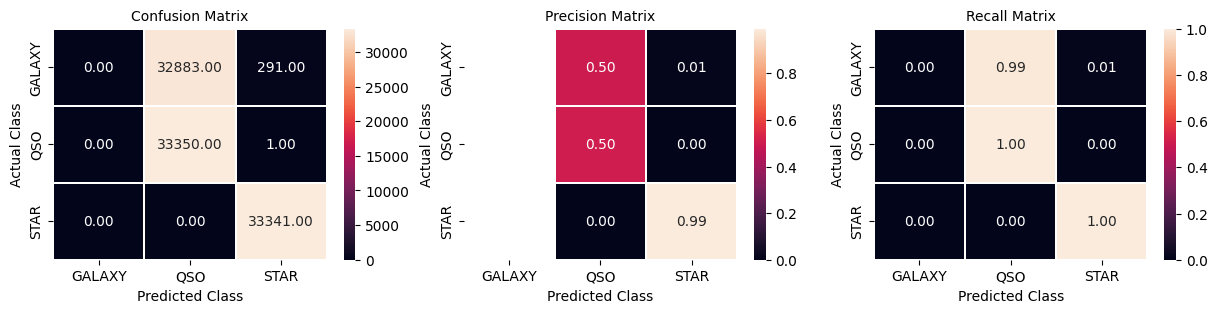

              precision    recall  f1-score   support

      GALAXY       0.00      0.00      0.00     33174
         QSO       0.50      1.00      0.67     33351
        STAR       0.99      1.00      1.00     33341

    accuracy                           0.67     99866
   macro avg       0.50      0.67      0.56     99866
weighted avg       0.50      0.67      0.56     99866

Accuracy: 0.6678048585104039
Cross Validation
Logloss: 0.48
Column sum of precision matrix: [nan  1.  1.]
Row sum of recall matrix:       [1. 1. 1.]


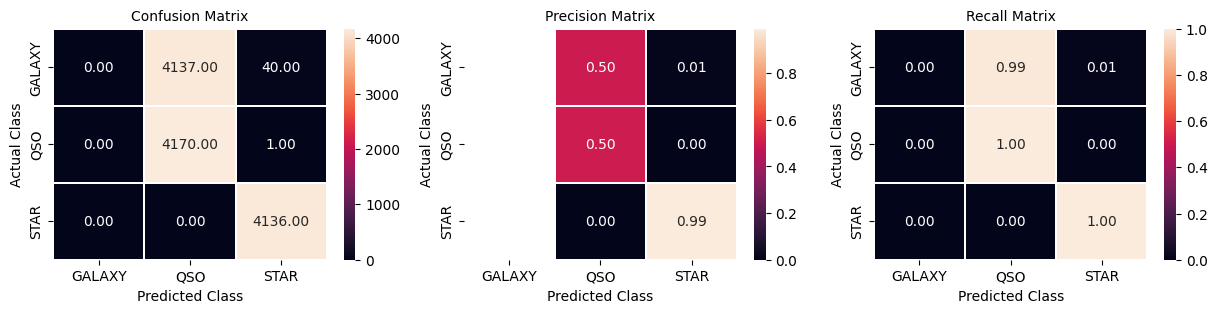

              precision    recall  f1-score   support

      GALAXY       0.00      0.00      0.00      4177
         QSO       0.50      1.00      0.67      4171
        STAR       0.99      1.00      1.00      4136

    accuracy                           0.67     12484
   macro avg       0.50      0.67      0.55     12484
weighted avg       0.50      0.67      0.55     12484

Accuracy: 0.6653316244793336
Test
Logloss: 0.476
Column sum of precision matrix: [nan  1.  1.]
Row sum of recall matrix:       [1. 1. 1.]


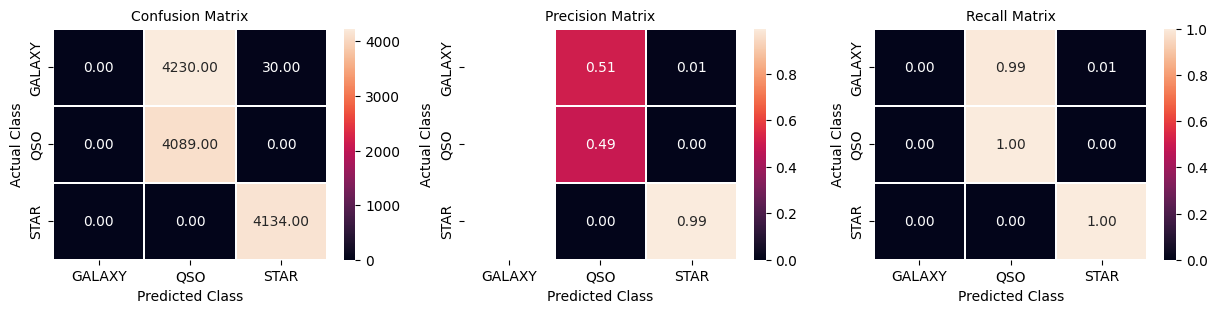

              precision    recall  f1-score   support

      GALAXY       0.00      0.00      0.00      4260
         QSO       0.49      1.00      0.66      4089
        STAR       0.99      1.00      1.00      4134

    accuracy                           0.66     12483
   macro avg       0.49      0.67      0.55     12483
weighted avg       0.49      0.66      0.55     12483

Accuracy: 0.6587358807978851


In [ ]:
model_name = 'fi_model_adab_classifier.pkl'

(adbc_tr_loss,
 adbc_cv_loss,
 adbc_te_loss) = adaboost_classifier(X_train=X_train,
                                     y_train=y_train,
                                     X_cv=X_cv,
                                     y_cv=y_cv,
                                     X_test=X_test,
                                     y_test=y_test,
                                     model_name=model_name)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
def gradient_boosting_classifier(X_train,
                                 y_train,
                                 X_cv,
                                 y_cv,
                                 X_test,
                                 y_test,
                                 dist,
                                 model_name,
                                 labels=labels):
    """
    This function builds the gradient boosting classifier.
    """
    model_path = get_model_path(model_name=model_name)

    if not os.path.isfile(path=model_path):
        clf = GradientBoostingClassifier(random_state=42)

        best = tuner(clf=clf, dist=dist, X=X_train, y=y_train)

        clf = GradientBoostingClassifier(n_estimators=best['n_estimators'],
                                         learning_rate=best['learning_rate'],
                                         random_state=42)
        clf.fit(X=X_train, y=y_train)

        sig_clf = CalibratedClassifierCV(base_estimator=clf)
        sig_clf.fit(X=X_train, y=y_train)

        with open(file=model_path, mode='wb') as m_pkl:
            pickle.dump(obj=(clf, sig_clf, best), file=m_pkl)
        print("Model saved into the disk.\n")
    else:
        with open(file=model_path, mode='rb') as m_pkl:
            clf, sig_clf, best = pickle.load(file=m_pkl)
        print("Loaded the saved model from the disk.\n")

    tr_loss = reporter(clf=sig_clf, X=X_train, y=y_train,
                       title='Train', best=best, labels=labels)
    cv_loss = reporter(clf=sig_clf, X=X_cv, y=y_cv,
                       title='Cross Validation', best=best, labels=labels)
    te_loss = reporter(clf=sig_clf, X=X_test, y=y_test,
                       title='Test', best=best, labels=labels)

    return tr_loss, cv_loss, te_loss

In [ ]:
#model_name = 'fi_model_gb_classifier.pkl'

#dist = dict(n_estimators=[5, 10, 25, 50, 100, 200, 250, 500],
#            learning_rate=[0.0001, 0.001, 0.01, 0.1, 0.5, 0.75, 1, 1.5])

#(gbc_tr_loss,
# gbc_cv_loss,
# gbc_te_loss) = gradient_boosting_classifier(X_train=X_train,
#                                             y_train=y_train,
#                                             X_cv=X_cv,
#                                             y_cv=y_cv,
#                                             X_test=X_test,
#                                             y_test=y_test,
#                                             dist=dist,
#                                             model_name=model_name)

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

In [ ]:
def evaluate_model(model, X, y):
    """
    Model evaluation for base learners in stacking classifier.

    Parameters
    ----------
    `model`: estimator
    `X`: features
    `y`: targets

    Returns cross validation scores.
    """
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(estimator=model,
                             X=X, y=y, scoring='accuracy',
                             cv=cv, n_jobs=-1,
                             error_score='raise')
    return scores

In [ ]:
def stacking_classifier(X_train,
                        y_train,
                        X_cv,
                        y_cv,
                        X_test,
                        y_test,
                        models,
                        model_name,
                        labels=labels):
    """
    This function builds the stacking classifier.
    """
    model_path = get_model_path(model_name=model_name)

    if not os.path.isfile(path=model_path):
        clf = StackingClassifier(estimators=models)
        clf.fit(X=X_train, y=y_train)

        with open(file=model_path, mode='wb') as m_pkl:
            pickle.dump(obj=clf, file=m_pkl)
        print("Model saved into the disk.\n")
    else:
        with open(file=model_path, mode='rb') as m_pkl:
            clf = pickle.load(file=m_pkl)
        print("Loaded the saved model from the disk.\n")

    tr_loss = reporter(clf=clf, X=X_train, y=y_train,
                       title='Train', labels=labels)
    cv_loss = reporter(clf=clf, X=X_cv, y=y_cv,
                       title='Cross Validation', labels=labels)
    te_loss = reporter(clf=clf, X=X_test, y=y_test,
                       title='Test', labels=labels)

    return tr_loss, cv_loss, te_loss

Loaded the saved model from the disk.

Train
Logloss: 0.011
Column sum of precision matrix: [1. 1. 1.]
Row sum of recall matrix:       [1. 1. 1.]


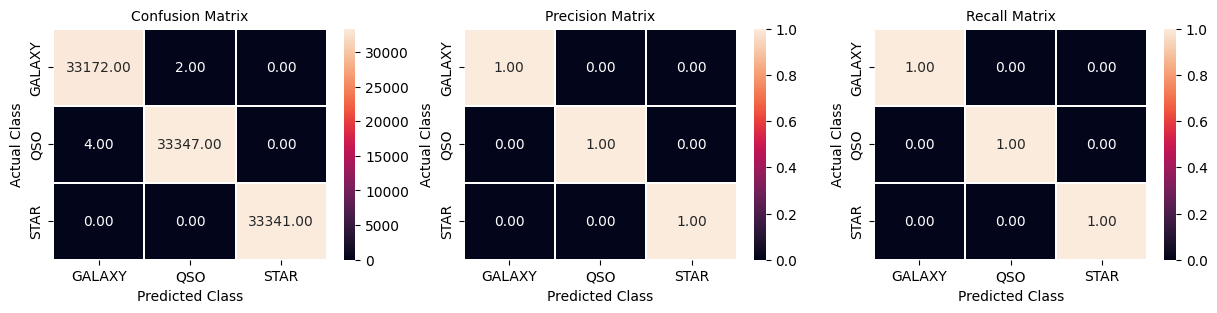

              precision    recall  f1-score   support

      GALAXY       1.00      1.00      1.00     33174
         QSO       1.00      1.00      1.00     33351
        STAR       1.00      1.00      1.00     33341

    accuracy                           1.00     99866
   macro avg       1.00      1.00      1.00     99866
weighted avg       1.00      1.00      1.00     99866

Accuracy: 0.9999399194921195
Cross Validation
Logloss: 0.057
Column sum of precision matrix: [1. 1. 1.]
Row sum of recall matrix:       [1. 1. 1.]


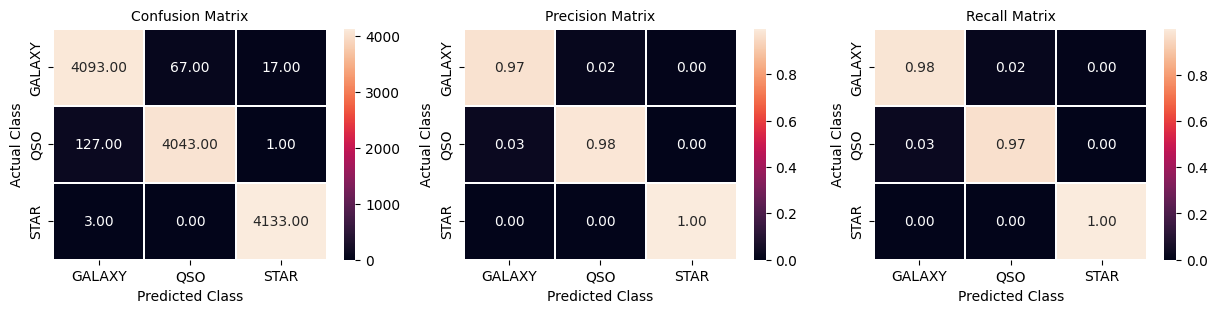

              precision    recall  f1-score   support

      GALAXY       0.97      0.98      0.97      4177
         QSO       0.98      0.97      0.98      4171
        STAR       1.00      1.00      1.00      4136

    accuracy                           0.98     12484
   macro avg       0.98      0.98      0.98     12484
weighted avg       0.98      0.98      0.98     12484

Accuracy: 0.9827779557834028
Test
Logloss: 0.058
Column sum of precision matrix: [1. 1. 1.]
Row sum of recall matrix:       [1. 1. 1.]


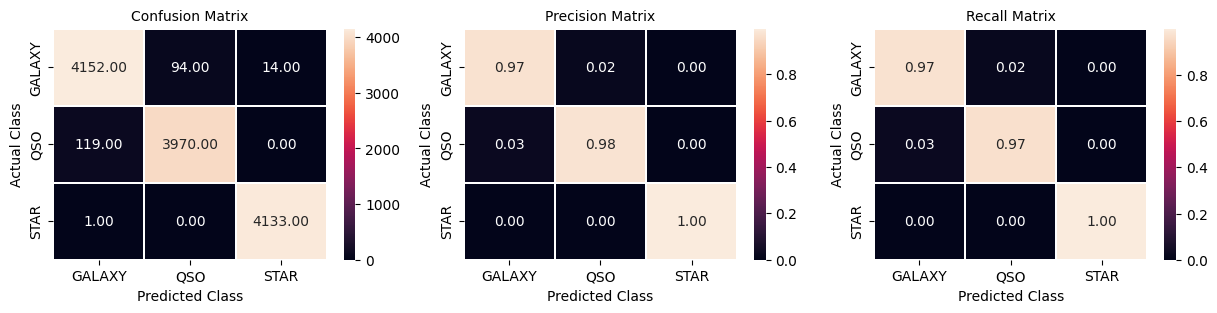

              precision    recall  f1-score   support

      GALAXY       0.97      0.97      0.97      4260
         QSO       0.98      0.97      0.97      4089
        STAR       1.00      1.00      1.00      4134

    accuracy                           0.98     12483
   macro avg       0.98      0.98      0.98     12483
weighted avg       0.98      0.98      0.98     12483

Accuracy: 0.9817351598173516


In [ ]:
model_name = 'model_stacking_classifier.pkl'

LR = LogisticRegression(penalty=logreg_best['penalty'],
                        C=logreg_best['C'],
                        class_weight='balanced',
                        random_state=42,
                        n_jobs=-1, max_iter=1000)

SV = SVC(C=svc_best['C'], random_state=42, class_weight='balanced')

KNN = KNeighborsClassifier(n_neighbors=knn_best['n_neighbors'], n_jobs=-1)

DT = DecisionTreeClassifier(criterion=dt_best['criterion'],
                            max_depth=dt_best['max_depth'],
                            min_samples_split=dt_best['min_samples_split'],
                            random_state=42)

RF = RandomForestClassifier(n_jobs=-1, random_state=42)

XGB = XGBClassifier(n_estimators=xgbc_best['n_estimators'], learning_rate=0.00001,
                    max_depth=xgbc_best['max_depth'], random_state=42) # Add XGBoost


models = [('LR', LR), ('SVC', SV), ('KNN', KNN), ('DT', DT), ('RF',RF), ('XGB',XGB)]

(stack_tr_loss,
 stack_cv_loss,
 stack_te_loss) = stacking_classifier(X_train=X_train,
                                      y_train=y_train,
                                      X_cv=X_cv,
                                      y_cv=y_cv,
                                      X_test=X_test,
                                      y_test=y_test,
                                      models=models,
                                      model_name=model_name)